# INTRODUCTION

## Overview
In this project, we will be analysing the Kings county housing dataset
Our objective is to use linear regression techniques to develop a model which can be used to predict the price of a home not already described in our original data set, based on the input of other data related to the house. 

Kings count is a county in Washington state. The western portion of it encompasses the city of Seattle. The data set contains sale information related to specific houes. It has around 21,000 records. 


# OBTAIN

## Importing libraries and dataset
First off, lets import the modules we will require for this analysis, as well as the dataset itself. We will make a copy of the original dataframe which will serve as our working dataframe, while preserving a clean copy of the original dataset if needed. Lets also set some universal options at this stage as well. After that, let's take a quick look at the head of our primary dataframe to get a glimpse of our data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
import warnings; warnings.simplefilter('ignore')
from math import sqrt

pd.set_option('precision', 4)
pd.set_option("display.precision", 8)
mpl.rcParams['figure.figsize'] = (20,20)

   
df0 = pd.read_csv('kc_house_data.csv')   
df1 = df0.copy()

display(df1.head())
display(df1.describe())
print(type(df1.info()))

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

id           price        bedrooms       bathrooms  \
count  2.15970000e+04  2.15970000e+04  21597.00000000  21597.00000000   
mean   4.58047429e+09  5.40296574e+05      3.37319998      2.11582627   
std    2.87673572e+09  3.67368140e+05      0.92629889      0.76898430   
min    1.00010200e+06  7.80000000e+04      1.00000000      0.50000000   
25%    2.12304918e+09  3.22000000e+05      3.00000000      1.75000000   
50%    3.90493041e+09  4.50000000e+05      3.00000000      2.25000000   
75%    7.30890049e+09  6.45000000e+05      4.00000000      2.50000000   
max    9.90000019e+09  7.70000000e+06     33.00000000      8.00000000   

          sqft_living        sqft_lot          floors      waterfront  \
count  21597.00000000  2.15970000e+04  21597.00000000  19221.00000000   
mean    2080.32185026  1.50994088e+04      1.49409640      0.00759586   
std      918.10612508  4.14126369e+04      0.53968279      0.08682485   
min      370.00000000  5.20000000e+02      1.00000000      0.00000000   
25%     1430.00000000  5.04000000e+03      1.00000000      0.00000000   
50%     1910.00000000  7.61800000e+03      1.50000000      0.00000000   
75%     2550.00000000  1.06850000e+04      2.00000000      0.00000000   
max    13540.00000000  1.65135900e+06      3.50000000      1.00000000   

                 view       condition           grade      sqft_above  \
count  21534.00000000  21597.00000000  21597.00000000  21597.00000000   
mean       0.23386273      3.40982544      7.65791545   1788.59684215   
std        0.76568620      0.65054564      1.17319966    827.75976116   
min        0.00000000      1.00000000      3.00000000    370.00000000   
25%        0.00000000      3.00000000      7.00000000   1190.00000000   
50%        0.00000000      3.00000000      7.00000000   1560.00000000   
75%        0.00000000      4.00000000      8.00000000   2210.00000000   
max        4.00000000      5.00000000     13.00000000   9410.00000000   

             yr_built    yr_renovated         zipcode             lat  \
count  21597.00000000  17755.00000000  21597.00000000  21597.00000000   
mean    1970.99967588     83.63677837  98077.95184516     47.56009299   
std       29.37523413    399.94641388     53.51307235      0.13855177   
min     1900.00000000      0.00000000  98001.00000000     47.15590000   
25%     1951.00000000      0.00000000  98033.00000000     47.47110000   
50%     1975.00000000      0.00000000  98065.00000000     47.57180000   
75%     1997.00000000      0.00000000  98118.00000000     47.67800000   
max     2015.00000000   2015.00000000  98199.00000000     47.77760000   

                 long   sqft_living15       sqft_lot15  
count  21597.00000000  21597.00000000   21597.00000000  
mean    -122.21398250   1986.62031764   12758.28351160  
std        0.14072353    685.23047190   27274.44195039  
min     -122.51900000    399.00000000     651.00000000  
25%     -122.32800000   1490.00000000    5100.00000000  
50%     -122.23100000   1840.00000000    7620.00000000  
75%     -122.12500000   2360.00000000   10083.00000000  
max     -121.31500000   6210.00000000  871200.00000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
<class 'None

## Preliminary Overview
We will now gather some information about our data set. The function below takes the dataset and returns a dataframe
with the following information for each column:
    1. The data type of the columns
    2. The missing values in the column, expressed as a percentage of the total records. 
    3. The number of unique values in the column
    4. The most common value in column
    5. The percentage of the column's values equal to the most common value in that column
    6. The second, third...nth most common values and the percentage of the column that consists of them

In [2]:
def report1 (dataframe,n_highest_counts):
    
    master={}
        
    for column in dataframe.columns:
        
        master[column]={}
        col_dict = master[column]
        col_dict['type'] = str(dataframe[column].dtypes)
        col_dict['% empty'] = round(((len(dataframe)-dataframe[column].count())/len(dataframe))*100,2)
        col_dict['unique values'] = dataframe[column].nunique()
        
        x = 1
        series1 = dataframe[column].value_counts().head(n_highest_counts)
        series1 = round((series1/len(dataframe)) * 100, 2)        
        
        for index,item in series1.items():
            value_prop = str(x) + 'nth_value_%'
            value_name = str(x) + 'nth_value'
            col_dict[value_name] = index
            col_dict[value_prop] = item
            x += 1
        
    df_report=pd.DataFrame.from_dict(master,orient='index')
    df_report.sort_values(['1nth_value_%'],ascending=False,inplace=True)
        
    return df_report

df_report = report1(df1,10)
display(df_report)

type  % empty  unique values 1nth_value  1nth_value_%  \
view           float64     0.29              5          0         89.93   
waterfront     float64    11.00              2          0         88.32   
yr_renovated   float64    17.79             70          0         78.77   
condition        int64     0.00              5          3         64.92   
sqft_basement   object     0.00            304        0.0         59.39   
floors         float64     0.00              6          1         49.42   
bedrooms         int64     0.00             12          3         45.49   
grade            int64     0.00             11          7         41.55   
bathrooms      float64     0.00             29        2.5         24.90   
zipcode          int64     0.00             70      98103          2.79   
yr_built         int64     0.00            116       2014          2.59   
sqft_lot15       int64     0.00           8682       5000          1.98   
sqft_lot         int64     0.00           9776       5000          1.66   
sqft_above       int64     0.00            942       1300          0.98   
sqft_living15    int64     0.00            777       1540          0.91   
price          float64     0.00           3622     350000          0.80   
date            object     0.00            372  6/23/2014          0.66   
sqft_living      int64     0.00           1034       1300          0.64   
long           float64     0.00            751    -122.29          0.53   
lat            float64     0.00           5033    47.6624          0.08   
id               int64     0.00          21420  795000620          0.01   

               2nth_value  2nth_value_%  3nth_value  3nth_value_%  4nth_value  \
view                    2          4.43           3          2.35           1   
waterfront              1          0.68         NaN           NaN         NaN   
yr_renovated         2014          0.34        2003          0.14        2013   
condition               4         26.29           5          7.88           2   
sqft_basement           ?          2.10       600.0          1.00       500.0   
floors                  2         38.13         1.5          8.84           3   
bedrooms                4         31.87           2         12.78           5   
grade                   8         28.08           9         12.11           6   
bathrooms               1         17.83        1.75         14.11        2.25   
zipcode             98038          2.73       98115          2.70       98052   
yr_built             2006          2.10        2005          2.08        2004   
sqft_lot15           4000          1.65        6000          1.33        7200   
sqft_lot             6000          1.34        4000          1.16        7200   
sqft_above           1010          0.97        1200          0.95        1220   
sqft_living15        1440          0.90        1560          0.89        1500   
price              450000          0.80      550000          0.74      500000   
date            6/26/2014          0.61   6/25/2014          0.61    7/8/2014   
sqft_living          1400          0.63        1440          0.62        1660   
long               -122.3          0.51    -122.362          0.48    -122.291   
lat               47.5491          0.08     47.5322          0.08     47.6846   
id             1825069031          0.01  2019200220          0.01  7129304540   

               ...  6nth_value 6nth_value_%  7nth_value 7nth_value_%  \
view           ...         NaN          NaN         NaN          NaN   
waterfront     ...         NaN          NaN         NaN          NaN   
yr_renovated   ...        2000         0.13        2005         0.13   
condition      ...         NaN          NaN         NaN          NaN   
sqft_basement  ...       800.0         0.93       400.0         0.85   
floors         ...         3.5         0.03         NaN          NaN   
bedrooms       ...           1         0.91           7         0.18   
grade   

# SCRUB
Lets clean our dataset and get rid of useless fluff. To keep track of how much of the original data is left over, let us define a function which we can call after each step in the cleaning process to make sure we arent getting rid of too much data. This function will tell us what percent of the number of rows in the original dataframe still remain in our cleaned and modified dataframe

In [3]:
def row_loss(df_base,df_current):
    
    rows_dropped = len(df_base) - len(df_current)
    rows_left = len(df_current)
    row_loss_perc = ((len(df_base) - rows_dropped)/len(df_base)) * 100
    row_loss_perc = round(row_loss_perc,2)
    
    metrics = [rows_dropped,rows_left,row_loss_perc]
    
    return metrics

def loss_report (df_base,df_current):
    stats_list = row_loss(df_base,df_current)
    
    for x in stats_list:
        x = str(x)
      
    string = "Rows Dropped: {}    Rows Left: {}   Percentage Remaining: {}".format(stats_list[0],stats_list[1],stats_list[2])
    
    print(string)
    

## Recasting Data Types
We now take a closer look at which columns have a datatype of 'object', and whether we may turn them into numbers. 

In [4]:
df_objects = list(df_report[df_report['type'] == 'object'].index)
display(df_objects)

['sqft_basement', 'date']

Lets turn these into more appropriate data types.

In [5]:
df1['date'] = pd.to_datetime(df1['date'])
#df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'])

I commented out the line to recast sqft_basement. Turns out it has some problematic values in it. Lets hold off for now, we may end up dropping this column later for other reasons. 

As for the 'date' column, on second thought, lets drop it. We need to convert all our data into numeric form. We could conceivably do this with the date column but it would require some engineering. But if we think about it, the date column is probably not very useful to us in this case. It describes the date that the house in question was sold. I dont really see how this can have any significant effect on the price of a house. Lets at least drop it for now and perhaps we can retrain our model with a modified version of it later to see if it makes any difference. 

In [6]:
df1 = df1.sort_values('date',ascending=True)
df1 = df1.drop(['date'],axis=1)

## Duplicate Records

We would like to assume that each row in the dataset refers to just one house. The 'id' column is described as being the unique identifier for a house. However, even though the dataset is 21597 records long, 'id' has 21420 unique values, and no missing values. This might indicate the existence of duplicates. 

The code below returns a list of id's that occur more than once in the dataframe. It then filters the dataframe to find all rows with those id numbers, sorts them by id number so we can observe the rows with the same Id numbers one on top of the other. If we see that the rest of the data in both rows with the same ID is also the same, we can confirm that these are true duplicates. 

In [7]:
df_id_Counts = df1['id'].value_counts()
repeats = df_id_Counts[df_id_Counts > 1]
repeats = list(repeats.index)

df_dups = df1[df1['id'].isin(repeats)]
df_dups.sort_values(by='id',inplace=True)

percent_of_duplicates = (len(df_dups) - len(repeats))/len(df1)
percent_of_duplicates = round(percent_of_duplicates *100,2)
                         
print("{}% of the rows in the dataframe are duplicate records".format(percent_of_duplicates))
display(df_dups.head(10))


0.82% of the rows in the dataframe are duplicate records


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2495     1000102  300000.0         6       3.00         2400      9373   
2494     1000102  280000.0         6       3.00         2400      9373   
16800    7200179  150000.0         2       1.00          840     12750   
16801    7200179  175000.0         2       1.00          840     12750   
11421  109200390  245000.0         3       1.75         1480      3900   
11422  109200390  250000.0         3       1.75         1480      3900   
12406  123039336  244900.0         1       1.00          620      8261   
12405  123039336  148000.0         1       1.00          620      8261   
7785   251300110  225000.0         3       2.25         2510     12013   
7786   251300110  358000.0         3       2.25         2510     12013   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
2495      2.0         0.0   0.0          3      7        2400           0.0   
2494      2.0         NaN   0.0          3      7        2400           0.0   
16800     1.0         0.0   0.0          3      6         840           0.0   
16801     1.0         0.0   0.0          3      6         840           0.0   
11421     1.0         0.0   0.0          4      7        1480           0.0   
11422     1.0         0.0   0.0          4      7        1480           0.0   
12406     1.0         0.0   0.0          3      5         620           0.0   
12405     1.0         0.0   0.0          3      5         620           0.0   
7785      2.0         0.0   0.0          3      8        2510           0.0   
7786      2.0         0.0   0.0          3      8        2510           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2495       1991           0.0    98002  47.3262 -122.214           2060   
2494       1991           0.0    98002  47.3262 -122.214           2060   
16800      1925           0.0    98055  47.4840 -122.211           1480   
16801      1925           NaN    98055  47.4840 -122.211           1480   
11421      1980           0.0    98023  47.2977 -122.367           1830   
11422      1980           0.0    98023  47.2977 -122.367           1830   
12406      1939           NaN    98106  47.5138 -122.364           1180   
12405      1939           0.0    98106  47.5138 -122.364           1180   
7785       1988           0.0    98003  47.3473 -122.314           1870   
7786       1988           0.0    98003  47.3473 -122.314           1870   

       sqft_lot15  
2495         7316  
2494         7316  
16800        6969  
16801        6969  
11421        6956  
11422        6956  
12406        8244  
12405        8244  
7785         8017  
7786         8017

As we can see, the duplicate ids refer to the same houses as they refer to houses with the same number of bedrooms, bathrooms, square footage etc. Given that only 0.82% of the rows of the dataset, we can safely discard them. Once we have done that, lets set the id number as the index of the dataframe, since now it truly is a unique identifies. This should help us with merges later on and maintain the integrity of our data. Lets also take a look at where our row loss metric stands


In [8]:
df1 = df1.drop_duplicates('id')
df1.set_index('id',inplace=True)

print(row_loss(df0,df1))

[177, 21420, 99.18]


## Placeholders and missing data. 

Finding missing values is simple enough: we can use native python methods to examine the null values in a given dataframe or series. But as we know, oftentimes datasets have palceholder values that are actually null values, although not encoded as such. Finding these is trickier. One way is to look at the counts of unique values in each dataframe column to see if anything jumps out.

Forunately, our custom report1 function will come in handy to find out if any particular values constitute and abormally large proportion of a gievn dataframe column. This could be an indication that there is a placeholder value that will skew our results. 

Lets take a look at the report again. 

In [9]:
display(df_report)     

type  % empty  unique values 1nth_value  1nth_value_%  \
view           float64     0.29              5          0         89.93   
waterfront     float64    11.00              2          0         88.32   
yr_renovated   float64    17.79             70          0         78.77   
condition        int64     0.00              5          3         64.92   
sqft_basement   object     0.00            304        0.0         59.39   
floors         float64     0.00              6          1         49.42   
bedrooms         int64     0.00             12          3         45.49   
grade            int64     0.00             11          7         41.55   
bathrooms      float64     0.00             29        2.5         24.90   
zipcode          int64     0.00             70      98103          2.79   
yr_built         int64     0.00            116       2014          2.59   
sqft_lot15       int64     0.00           8682       5000          1.98   
sqft_lot         int64     0.00           9776       5000          1.66   
sqft_above       int64     0.00            942       1300          0.98   
sqft_living15    int64     0.00            777       1540          0.91   
price          float64     0.00           3622     350000          0.80   
date            object     0.00            372  6/23/2014          0.66   
sqft_living      int64     0.00           1034       1300          0.64   
long           float64     0.00            751    -122.29          0.53   
lat            float64     0.00           5033    47.6624          0.08   
id               int64     0.00          21420  795000620          0.01   

               2nth_value  2nth_value_%  3nth_value  3nth_value_%  4nth_value  \
view                    2          4.43           3          2.35           1   
waterfront              1          0.68         NaN           NaN         NaN   
yr_renovated         2014          0.34        2003          0.14        2013   
condition               4         26.29           5          7.88           2   
sqft_basement           ?          2.10       600.0          1.00       500.0   
floors                  2         38.13         1.5          8.84           3   
bedrooms                4         31.87           2         12.78           5   
grade                   8         28.08           9         12.11           6   
bathrooms               1         17.83        1.75         14.11        2.25   
zipcode             98038          2.73       98115          2.70       98052   
yr_built             2006          2.10        2005          2.08        2004   
sqft_lot15           4000          1.65        6000          1.33        7200   
sqft_lot             6000          1.34        4000          1.16        7200   
sqft_above           1010          0.97        1200          0.95        1220   
sqft_living15        1440          0.90        1560          0.89        1500   
price              450000          0.80      550000          0.74      500000   
date            6/26/2014          0.61   6/25/2014          0.61    7/8/2014   
sqft_living          1400          0.63        1440          0.62        1660   
long               -122.3          0.51    -122.362          0.48    -122.291   
lat               47.5491          0.08     47.5322          0.08     47.6846   
id             1825069031          0.01  2019200220          0.01  7129304540   

               ...  6nth_value 6nth_value_%  7nth_value 7nth_value_%  \
view           ...         NaN          NaN         NaN          NaN   
waterfront     ...         NaN          NaN         NaN          NaN   
yr_renovated   ...        2000         0.13        2005         0.13   
condition      ...         NaN          NaN         NaN          NaN   
sqft_basement  ...       800.0         0.93       400.0         0.85   
floors         ...         3.5         0.03         NaN          NaN   
bedrooms       ...           1         0.91           7         0.18   
grade   

### Analysis
From the preceeding, we can make the following observations:

1. "View" is a binary categorical variable, indicating whether a house has been viewed or not. 90% of the 'view' column has a value of '0', meaning 90% of the houses have not been viewed. This makes is highly likely that this column is not really providing us any useful information. We should probably drop it. 

2. Similary, 88% of 'waterfront' is also '0'. It seems most likely that waterfront is a binary categorical variable, i.e. a house either is not on the waterfront (in which case ot gets a 'o' value), or it is (in which case it gets '1'). Perhaps being on the waterfront makes a house more valuable, and if we build a model that takes into account whether a house is on the waterfront it may be more accurate. However, 11% of the data is missing. Lets fill those missing values with 0, since most houses likely are not waterfront adjacent. 

3. year renovated definitely seems like it should be deleted. 80% of the values are '0', which cannot be explained by the nature of the information in this column ('0' is not a year). And as we saw before, 17% of the values are missing. 

4. condition again seems to be a categorical variable. the values range from 1 to 5, and its probably a way of saying "on a scale of 1 to 5 what is the condition of the property". The most frequent value is 3, occuring 65% of the time, then 4 at 26% of the time. It tapers of before and after. If I had to guess, these values are normally distributed. 3 is right down the middle of the scale, and it makes sense that most houses would be in average condition, and more extreme conditions are less and less likely. We can double check this with a histogram. But we definitely want to retain condition in our feature set. 

5. sqft_basement should definitely go. Around 60% of the values are '0'. 2% are '?'. The remainign values are in increments of 100, which is highly unlikely for a quantity that one would expect to be more continuos and varying (compare with other square foot based columns). 

6. Around 50% of houses have only 1 floor. 40% have 2 floors. It goes down from there. This makes sense. Lets leave this feature in place. 

7. A large portion of houses(45%) have three bedrooms. 32% have 4 bedrooms. The rest have lesser or more. This also in line with what we would expect. 3 seems like the numebr of bedrooms we would expect most houses to have, so this is not unusual. Lets keep this feature

8. 7 is the most common value for grade at 42%. Given that grade ranges from 3 to 13 and 7 is kind of in the middle, this also makes sense. Again, one would expect most houses to be graded average. 

9. Bathrooms also does not seem to have any glaring outliers, and seems in line with our expectations for the most common number of bathrooms across homes. 

Thus far, our list of features to remove looks like this:  

        ['view','yr_renovated','sqft_basement']

Lets drop these columns and return a new dataframe. 

In [10]:
high_null_columns = ['view','yr_renovated','sqft_basement']

df1=df1.drop(high_null_columns,axis=1)
df1['waterfront'] = df1['waterfront'].fillna(value=0)

display(df1.head())
print(df1.info())
print(row_loss(df0,df1))

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
2202500290  435000.0         4        1.0         1450      8800     1.0   
7853361370  555000.0         4        2.5         3310      6500     2.0   
7197300105  550000.0         4        2.5         1940     10500     1.0   
3438501320  295000.0         2        2.5         1630      1368     2.0   
472000620   790000.0         3        2.5         2600      4750     1.0   

            waterfront  condition  grade  sqft_above  yr_built  zipcode  \
id                                                                        
2202500290         0.0          4      7        1450      1954    98006   
7853361370         0.0          3      8        3310      2012    98065   
7197300105         0.0          4      7        1140      1976    98052   
3438501320         0.0          3      7        1280      2009    98106   
472000620          0.0          4      9        1700      1951    98117   

                lat     long  sqft_living15  sqft_lot15  
id                                                       
2202500290  47.5746 -122.135           1260        8942  
7853361370  47.5150 -121.870           2380        5000  
7197300105  47.6830 -122.114           2200       10500  
3438501320  47.5489 -122.363           1590        2306  
472000620   47.6833 -122.400           2380        4750

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2202500290 to 9106000005
Data columns (total 16 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
yr_built         21420 non-null int64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(6), int64(10)
memory usage: 2.8 MB
None
[177, 21420, 99.18]


## Colinearity

Lets check colinearity across all columns, to help us remove redundant features. 
A heatmap of correlation values will helpful to visually assess correlation among the features. 

The function below generates a clean, non-redundant heatmap of correlation values for the columns of our dataframe. 

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee64f871d0>)

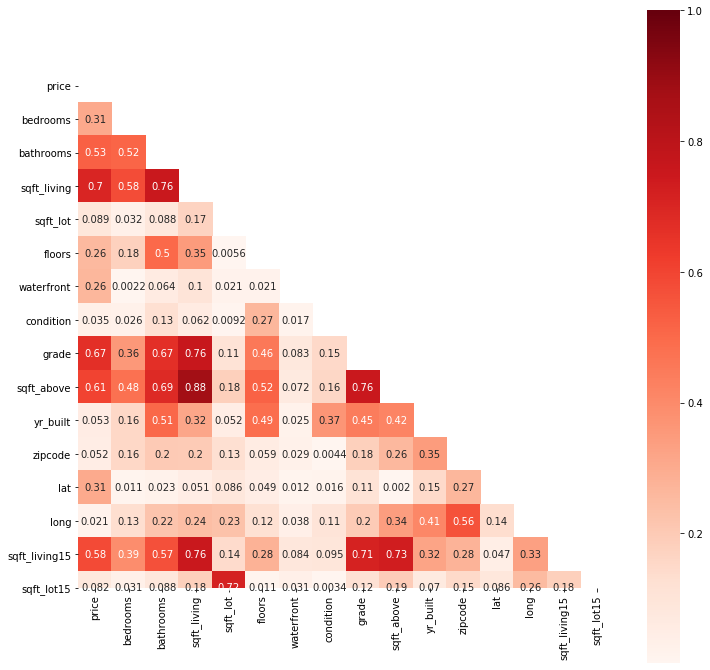

In [11]:
def colinearity_plot(corr,figsize=(12,12)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax

colinearity_plot(np.abs(df1.corr()))

It looks like some features a strongly co-related, and hence good candidates for removal on account of the multi-colinearity they introduce into the model. 

The function below returns a series consisting of pairs of columns with a Pearson correlation co-efficient higher than 
the specified threshold. The column pairs are displayed as elements of a multilevel index.

We will use this function to return a list of feature pairs with a co-relation value higher than 0.75.

In [12]:
 def high_corr(dataframe,threshold):
    corr = dataframe.corr()
    sign_corr = corr[abs(corr) > threshold]
    sign_corr = sign_corr.stack()
    sign_corr.drop_duplicates(inplace=True)
    sign_corr = sign_corr[sign_corr != 1]
    
    
    return sign_corr

display(high_corr(df1,0.75))

bathrooms    sqft_living      0.75552196
sqft_living  grade            0.76247748
             sqft_above       0.87653308
             sqft_living15    0.75618592
grade        sqft_above       0.75622098
dtype: float64

### Analysis

    Looks like sqft_living correlates with the highest number of other features. While it seems somewhat counter-intuitive to remove a metric as fundamental to evaluating home prices as square footage, on the other hand it seems the other features it co-relates to cover this information. Obviously higher bathrooms means higher square footage. But also, square_above seems to be a more on point data series. We are taking out basement squre footage anyways, and square above reflects this. So we may end up with a cleaner data set if we just take out square footage. 

In [13]:
colinear_columns = ['sqft_living']

df1 = df1.drop(colinear_columns,axis=1)

display(report1(df1,3))
print(row_loss(df0,df1))

type  % empty  unique values   1nth_value  1nth_value_%  \
waterfront     float64      0.0              2       0.0000         99.32   
condition        int64      0.0              5       3.0000         64.89   
floors         float64      0.0              6       1.0000         49.26   
bedrooms         int64      0.0             12       3.0000         45.43   
grade            int64      0.0             11       7.0000         41.50   
bathrooms      float64      0.0             29       2.5000         24.99   
zipcode          int64      0.0             70   98103.0000          2.80   
yr_built         int64      0.0            116    2014.0000          2.61   
sqft_lot15       int64      0.0           8682    5000.0000          1.98   
sqft_lot         int64      0.0           9776    5000.0000          1.66   
sqft_above       int64      0.0            942    1300.0000          0.98   
sqft_living15    int64      0.0            777    1540.0000          0.90   
price          float64      0.0           3607  350000.0000          0.80   
long           float64      0.0            751    -122.2900          0.53   
lat            float64      0.0           5033      47.6624          0.08   

                2nth_value  2nth_value_%   3nth_value  3nth_value_%  
waterfront          1.0000          0.68          NaN           NaN  
condition           4.0000         26.34       5.0000          7.88  
floors              2.0000         38.30       1.5000          8.81  
bedrooms            4.0000         31.97       2.0000         12.77  
grade               8.0000         28.20       9.0000         12.17  
bathrooms           1.0000         17.71       1.7500         14.10  
zipcode         98038.0000          2.74   98115.0000          2.69  
yr_built         2006.0000          2.11    2005.0000          2.10  
sqft_lot15       4000.0000          1.65    6000.0000          1.33  
sqft_lot         6000.0000          1.34    4000.0000          1.16  
sqft_above       1010.0000          0.95    1200.0000          0.95  
sqft_living15    1560.0000          0.89    1440.0000          0.89  
price          450000.0000          0.80  550000.0000          0.73  
long             -122.3000          0.51    -122.3620          0.48  
lat                47.5322          0.08      47.6846          0.08

[177, 21420, 99.18]


# EXPLORE
Lets begin our exploration of the dataset with a scatter mattrix, to get some insight into outliers and categorical variables. We will also make a copy of the dataframe as we have modified it thus far, because we may want to tweak what we do next in a future iteration of this process. 

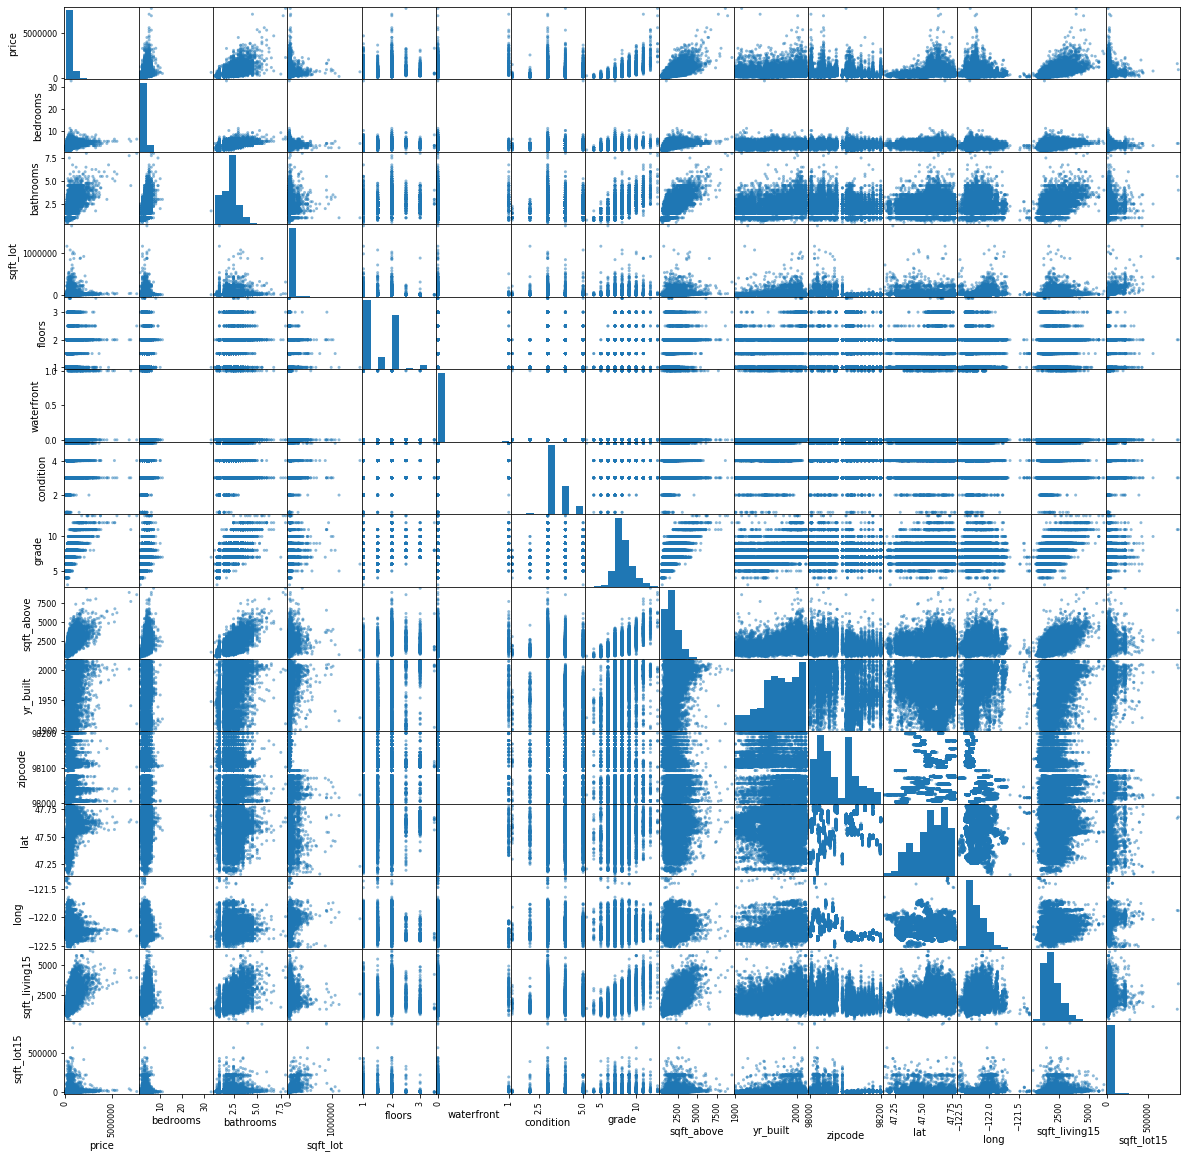

In [14]:
pd.plotting.scatter_matrix(df1,figsize=(20,20)); 
df_preproc = df1.copy()

## Outliers
I want to first remove outliers before scaling data. This seems like the correct approach, because I feel like scaling the data with outliers will produce skewed distributions which I will have to recorrect for outliers anyways, and end up removing the same outlying values I will now. I also want to use min-max scaling as I understand it is better at bringing data into more homogenous scales across columns.

First lets draw boxplots for all our columns to identify which columns we should cull outliers from.

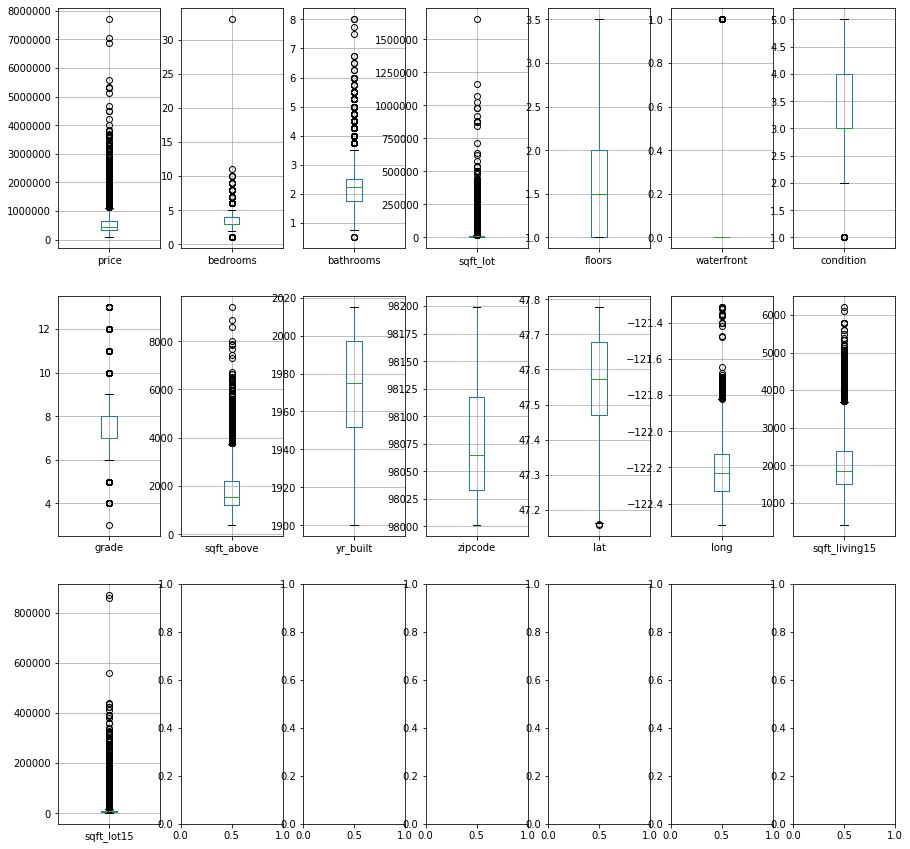

In [15]:
def box_matrix (dataframe):
    df1 = dataframe
    col_nums = len(df1.columns)
    if col_nums % 7 > 0:
        chart_cols = int(round((col_nums/7)+1,0))
    else:
        chart_cols = int(round((col_nums/7),0))

    figure, ax = plt.subplots(chart_cols,7,figsize=(15,15))

    ax = ax.reshape(-1)

    for i,col in enumerate(df1.columns):
        df1.boxplot(column=col,ax=ax[i])
     

box_matrix(df1)

From these boxplots, we can identify some good candidates for culling outliers.

In [16]:
cull_cols = ['sqft_lot15','price','sqft_lot','sqft_living15','bedrooms']

Now lets write a function that culls values above a certain percentile for the columns we listed above.

In [17]:
def rm_outliers_dict (dataframe, culling_dict):
    outliers_list = []
    for col in culling_dict.keys():
        outlier_indices = list(dataframe[dataframe[col] >= culling_dict[col]].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list)        
    
    return dataframe

def rm_outliers_threshold (dataframe, columns, threshold):
    outliers_list = []
    for col in columns:
        outlier_indices = list(dataframe[dataframe[col] >= dataframe[col].quantile(threshold)].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list) 
    return dataframe

def cull_report (dataframe,columns,base_threshold,df_base):
    
    report_dict = {}
        
    y = int(base_threshold * 100)
    
    for x in range (100,y,-1):
        
        x = float(x/100)
        
        df = rm_outliers_threshold(dataframe,columns,x)
        loss_metrics = row_loss(df_base,df)
        report_dict[str(x)] = loss_metrics
    
    report_df = pd.DataFrame.from_dict(report_dict,orient='index',columns=['rows_dropped','rows_left','row_loss_perc'])
    
    return report_df

In [18]:
culling_dict = {
    'price':4000000,
    'sqft_lot':500000,
    'sqft_above':6000,
    'sqft_living15':5300,
    'sqft_lot15':400000
}

cull_cols = ['sqft_lot15','price','sqft_lot','sqft_living15']

df11 = df1.copy()
df12 = rm_outliers_dict(df11,culling_dict)
df13 = cull_report(df12,cull_cols,.8,df11)

<Figure size 1440x720 with 0 Axes>

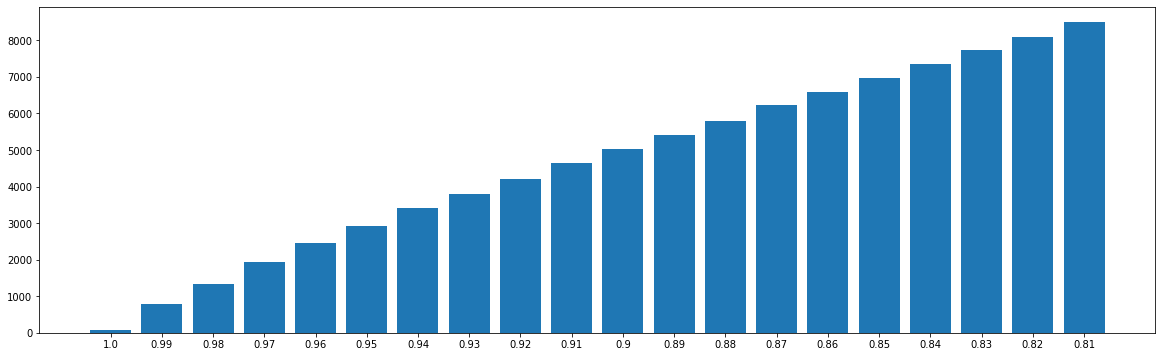

<Figure size 1440x720 with 0 Axes>

In [19]:
mpl.rcParams['figure.figsize'] = (20,6)
plt.bar(df13.index,df13['rows_dropped'])
plt.figure(figsize=(20,10))

It seems like removing rows containing a value that exceeds the .98 quantile for any column is a good place for us to take out the more extreme outliers without losing too much of our data. Lets drop those rows. 

In [20]:
df1 = rm_outliers_threshold (df1, cull_cols,.98)
loss_report(df0,df1)

Rows Dropped: 1453    Rows Left: 20144   Percentage Remaining: 93.27


Lets see if this improved out scatter plots.

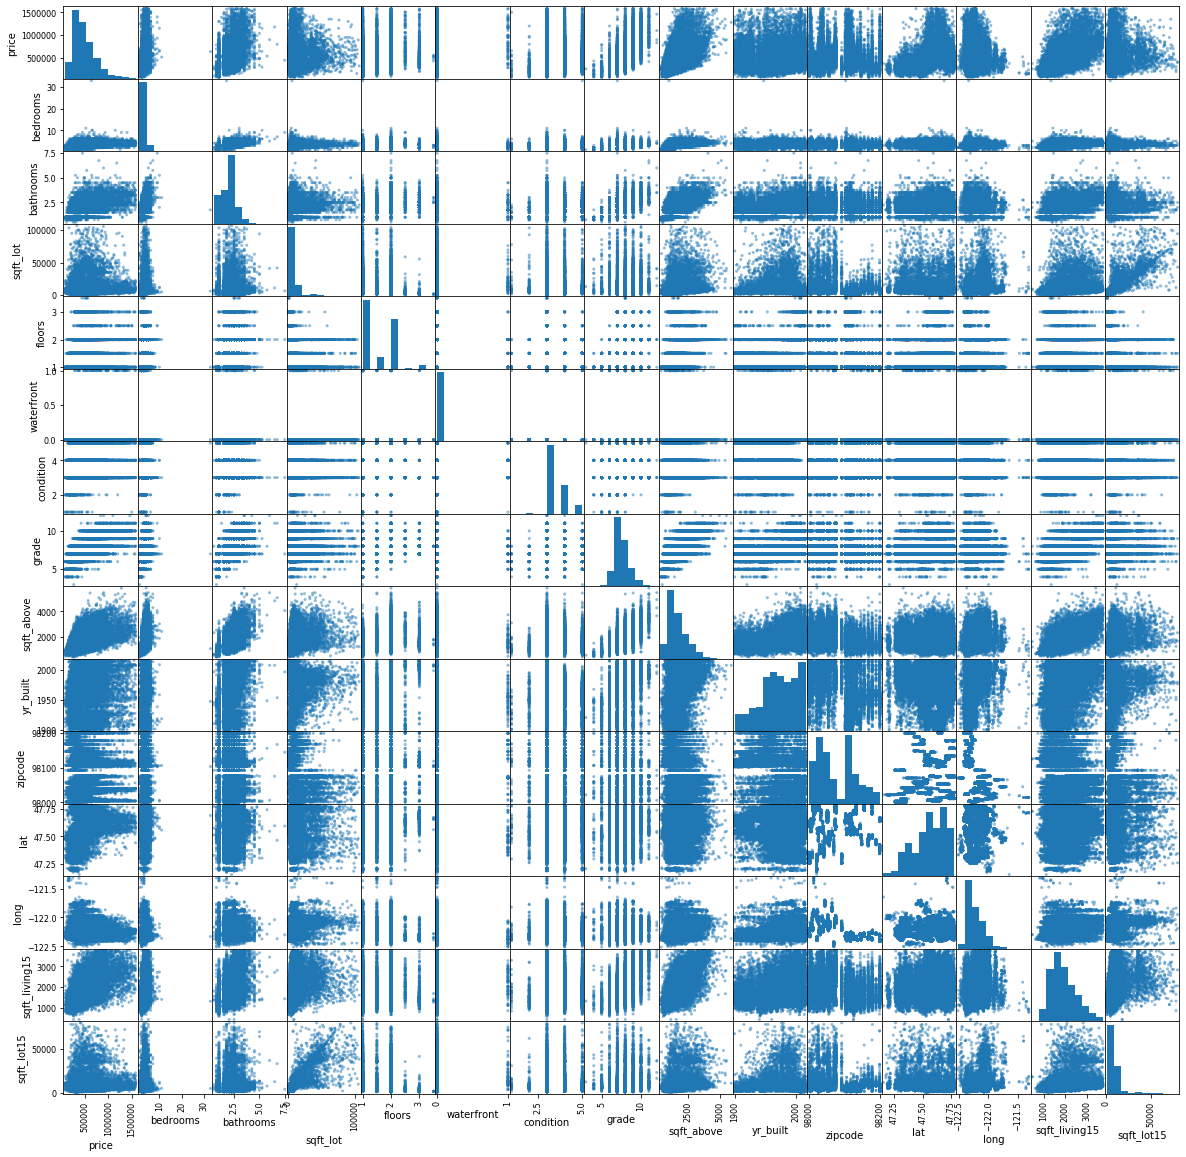

In [21]:
pd.plotting.scatter_matrix(df1,figsize=(20,20));

## Normality of Features
Lets pull histograms of our features to get a sense of their distributions. 

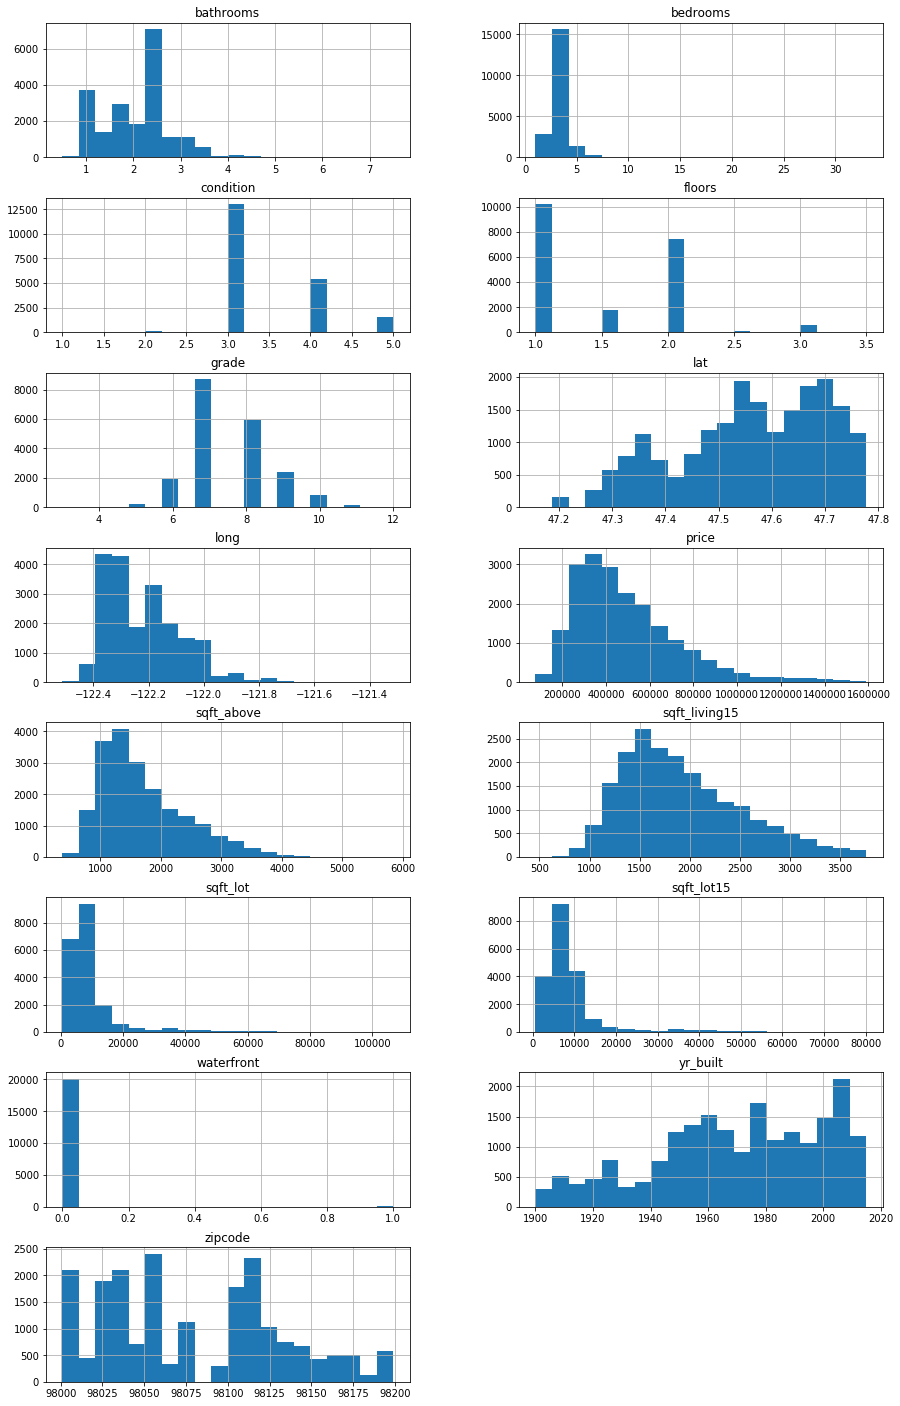

In [22]:
df1.hist(bins=20,layout=(8,2),figsize=(15,25));

From these histograms we can see that the following are good candidates for normalization:

In [23]:
norm_cols = ['bathrooms','sqft_above','sqft_living15','sqft_lot','sqft_lot15']

Should we normalize 'Price', given that its our target variable? Lets hold off for now and revisit. 

Below is a function that will normalize specified columns in a dataframe using np.log. Lets use it to normalize our 

In [24]:
def logarize (dataframe,columns):
    
    df = dataframe
    
    for col in columns:
        df[col] =df[col].map(lambda x: np.log(x))
    
    return df

df1 = logarize(df1,norm_cols)

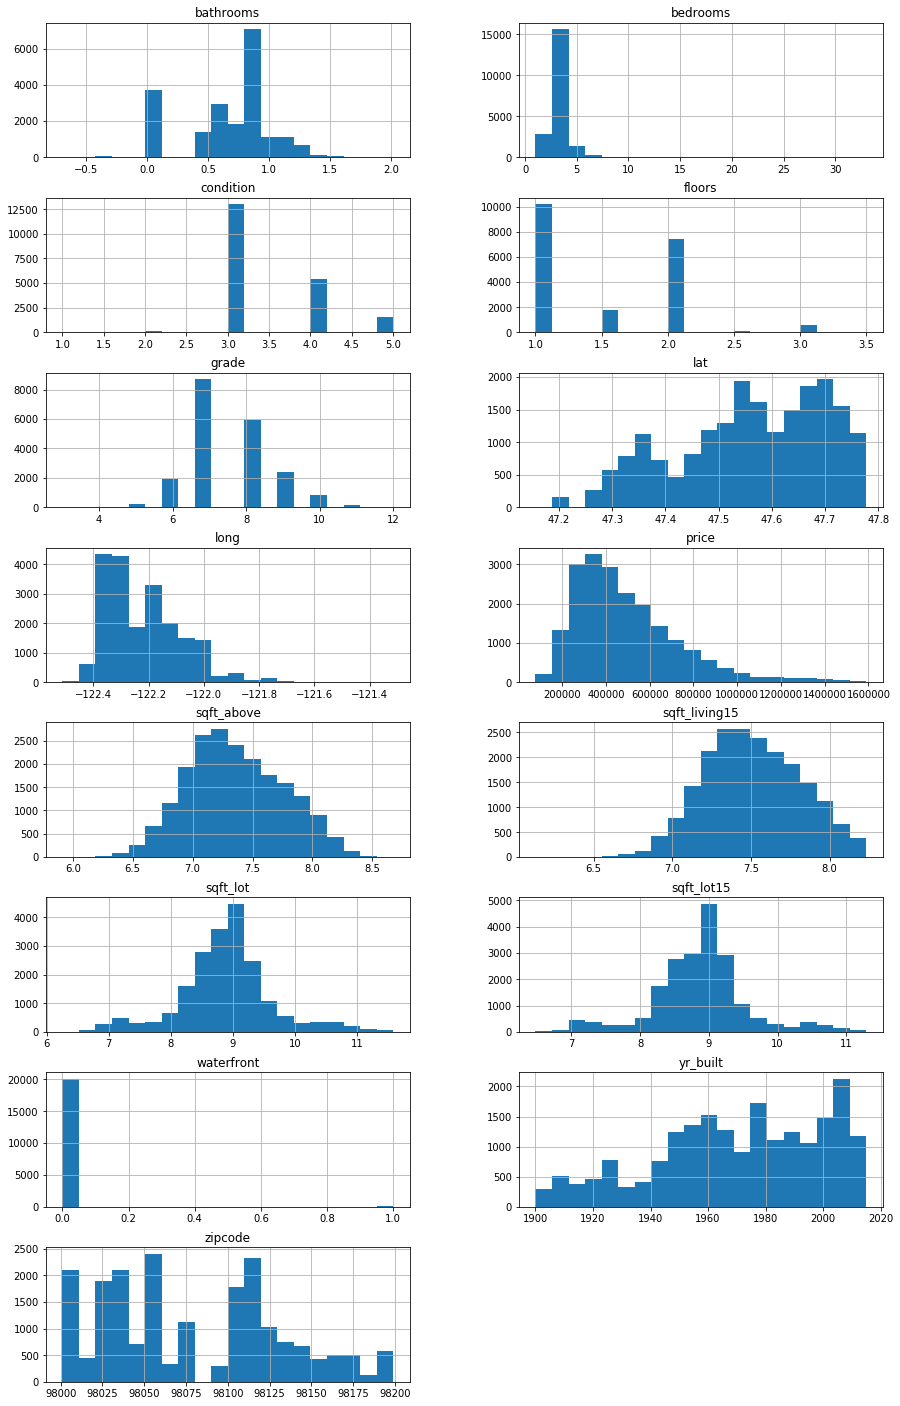

In [25]:
df1.hist(bins=20,layout=(8,2),figsize=(15,25));

## Categorical Variables
We must evaluate our features to see if any of them can rightly be treated as categorical variables, and then undertake the appropriate transformations of our data. From the scatter plots we drew before it seems that the following features might be categorical variables:

In [26]:
categ_cols =  ['floors','condition','grade','zipcode','waterfront']

Zipcode definitely seems like a good candidate for a categorical variable to which we can apply one hot encoding. So does Waterfront. However, the remaining variables seem...inherently numeric, granted they dont have a large range of values. The number of floors a house has is still a number. Condition and grade are attempts to quantify qualitative features, and as such have already been converted to numeric features for us. 

In [27]:
categ_cols =  ['zipcode','waterfront']

Now lets run one hot encoding on zipcode and then compile our final scaled dataframe. The function below returns a dataframe with the one-hot columns for the specified columns tacked on to the original dataframe.

In [28]:
def category_frame (dataframe,categ_cols):
    for col in categ_cols:
        cat_frame = pd.get_dummies(dataframe[col])
        cat_frame = cat_frame.astype('int64')
        
        dataframe = dataframe.merge(cat_frame,left_index=True,right_index=True)
        dataframe.drop(col,axis=1,inplace=True)
    return dataframe

categ_cols = ['zipcode']
df1 = category_frame(df1,categ_cols)

## Scaling


Its time to scale our features. I will use min-max, since I have already removed outliers. Perhaps after training my initial model i'll experiment with other scaling methods. 


In [29]:
def min_max_col (series):
    scaled = (series - min(series)) / (max(series) - min(series))
    return scaled

def df_scaler (dataframe):
    for col in dataframe.columns:
        dataframe[col] = min_max_col(dataframe[col])
    return dataframe

price = df1['price']
df1.drop('price',axis=1,inplace=True)

df1 = df_scaler(df1)

# MODEL

Lets put together the final dataframe that we will feed into our models. 

In [30]:
target = price
predictors = df1

## Preliminary OLS Model
Lets fit our first model. We will start with OLS in statsmodels. 

In [31]:
pred_int = sm.add_constant(predictors)
model = sm.OLS(target,pred_int).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     972.1
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        05:59:22   Log-Likelihood:            -2.6238e+05
No. Observations:               20144   AIC:                         5.249e+05
Df Residuals:                   20061   BIC:                         5.256e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.262e+05   2.25e+04    -14.488      0.000    -3.7e+05   -2.82e+05
bedrooms       3.274e+04   3.43e+04      0.954      0.340   -3.45e+04       1e+05
bathrooms      1.711e+05   8804.285     19.434      0.000    1.54e+05    1.88e+05
sqft_lot       2.025e+05   1.43e+04     14.184      0.000    1.75e+05     2.3e+05
floors        -5.293e+04   5842.144     -9.060      0.000   -6.44e+04   -4.15e+04
waterfront     4.046e+05   1.36e+04     29.726      0.000    3.78e+05    4.31e+05
condition       1.04e+05   5384.344     19.309      0.000    9.34e+04    1.15e+05
grade          6.347e+05   1.16e+04     54.754      0.000    6.12e+05    6.57e+05
sqft_above     4.143e+05   1.11e+04     37.238      0.000    3.93e+05    4.36e+05
yr_built      -8.177e+04   5246.918    -15.585      0.000   -9.21e+04   -7.15e+04
lat            4.415e+04    2.9e+04      1.521      0.128   -1.28e+04    1.01e+05
long          -1.393e+05   4.04e+04     -3.450      0.001   -2.19e+05   -6.02e+04
sqft_living15  1.969e+05   8709.470     22.604      0.000     1.8e+05    2.14e+05
sqft_lot15    -4.031e+04   1.41e+04     -2.865      0.004   -6.79e+04   -1.27e+04
98001         -2.001e+05   1.29e+04    -15.564      0.000   -2.25e+05   -1.75e+05
98002         -1.616e+05   1.36e+04    -11.843      0.000   -1.88e+05   -1.35e+05
98003         -2.104e+05   1.33e+04    -15.821      0.000   -2.36e+05   -1.84e+05
98004          3.786e+05   8139.388     46.517      0.000    3.63e+05    3.95e+05
98005          1.041e+05   9514.217     10.946      0.000    8.55e+04    1.23e+05
98006          8.065e+04   5991.189     13.462      0.000    6.89e+04    9.24e+04
98007          3.919e+04   1.01e+04      3.887      0.000    1.94e+04    5.89e+04
98008          4.784e+04   8168.622      5.857      0.000    3.18e+04    6.39e+04
98010         -7.791e+04    1.7e+04     -4.581      0.000   -1.11e+05   -4.46e+04
98011         -8.784e+04   1.26e+04     -6.985      0.000   -1.12e+05   -6.32e+04
98014         -5.188e+04    1.9e+04     -2.737      0.006    -8.9e+04   -1.47e+04
98019         -1.044e+05   1.54e+04     -6.801      0.000   -1.35e+05   -7.43e+04
98022         -1.485e+05    1.9e+04     -7.797      0.000   -1.86e+05   -1.11e+05
98023         -2.314e+05   1.35e+04    -17.112      0.000   -2.58e+05   -2.05e+05
98024         -3.116e+04   1.97e+04     -1.583      0.114   -6.98e+04    7434.134
98027          7885.1723   8229.595      0.958      0.338   -8245.511     2.4e+04
98028         -9.364e+04   1.17e+04     -7.990      0.000   -1.17e+05   -7.07e+04
98029          3.137e+04   9591.790      3.270      0.001    1.26e+04    5.02e+04
98030         -1.957e+05   1.09e+04    -17.988      0.000   -2.17e+05   -1.74e+05
98031         -1.934e+05   9536.345    -20.282      0.000   -2.12e+05   -1.75e+05
98032         -1.984e+05    1.3e+04    -15.207   

### Validation 
Lets validate this model using train test split. We will split our dataset into chunks ranging from 5% of the dataset to 95% of the dataset, in increments of 5%. For each test, we will generate a hundered random splits of the data into training and test sets of the given test size. We will fit our model, use it to predict values on the test set and the gather the mean squared error for each iteration in the 25 random samples. We will take the average mean squared error from 25 samples at each test size and add them to a results data frame. In this way, we will be able to analyze the spread in the mean squared error between the training set and the test set, for different sizes of test sets. 

In [32]:
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = (20,10)

def test_size_validation (predictors,target):
    collection = []
    size = []
    x= 0.05
    
    while x < 0.95:
        
        errorlist = []
        
        for j in range(1,50):
            
            x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=x)
            
            x_train_int= sm.add_constant(x_train)
            
            x_test_int= sm.add_constant(x_test)
            
            olsmod = sm.OLS(y_train,x_train_int).fit()
                       
            y_train_hat = olsmod.predict(x_train_int)
            
            y_test_hat = olsmod.predict(x_test_int)
            
            train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

            test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
            
            errorlist.append([train_mse,test_mse])


        saveframe = pd.DataFrame(errorlist,columns=['train','test'])   
        collection.append([str(x), round(saveframe['train'].mean(),3),round(saveframe['test'].mean(),3),0])   

        x = round((x + 0.05),2)

    coll_frame = pd.DataFrame(collection,columns=['size','train','test','delta%'])
    coll_frame['delta%'] = ((coll_frame['test'] - coll_frame['train'])/coll_frame['train']) * 100
    coll_frame['delta%'] = round(coll_frame['delta%'],2)
    coll_frame.set_index('size',inplace=True)    
    
    return coll_frame



Now lets use this function to run a validation test on our dataset. We will also generate some visualizations to assess the impact of test size on the difference in mean squared error between the training and test sets at those test sizes. 

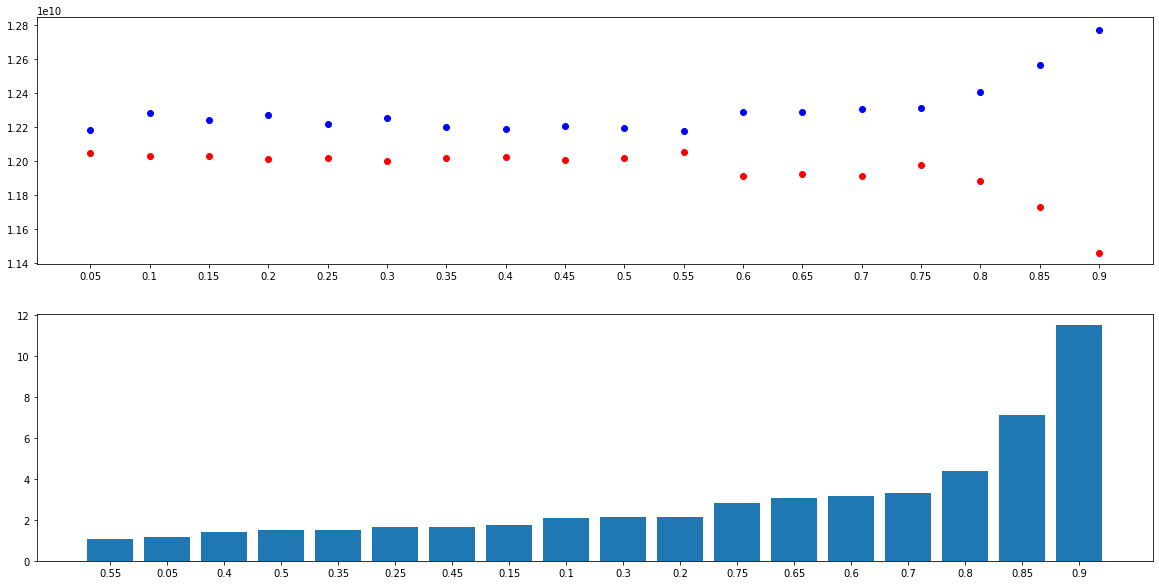

In [33]:
def chart_train_test (predictors,target):
    coll_frame = test_size_validation(predictors, target)

    fig, ax = plt.subplots(2,1)

    coll_frame.sort_index(ascending=True,inplace=True)

    ax[0].scatter(coll_frame.index.values,coll_frame['train'],c='red')
    ax[0].scatter(coll_frame.index.values,coll_frame['test'],c='blue')

    coll_frame.sort_values('delta%',ascending=True,inplace=True)
    ax[1].bar(coll_frame.index.values,coll_frame['delta%'])

chart_train_test(predictors,target)

It seems like a test data set size of 25% is a good size for splitting our dataset. Lets modify our function to validate OLS models by splitting the data up into these proportions randomly for 100 iterations and then gathering the mean squared error and the R-squared value. 

In [34]:
from math import sqrt
def mse_validation (predictors,target):
    collection = []
    x= 0.25            
    errorlist = []

    for j in range(1,25):

        x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=x)

        x_train_int= sm.add_constant(x_train)

        x_test_int= sm.add_constant(x_test)

        olsmod = sm.OLS(y_train,x_train_int).fit()

        y_train_hat = olsmod.predict(x_train_int)

        y_test_hat = olsmod.predict(x_test_int)

        train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

        test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
        
        train_r2 = olsmod.rsquared
        
        train_rmse = sqrt(train_mse)
        
        test_rmse = sqrt(test_mse)

        errorlist.append([train_mse,test_mse,train_r2,train_rmse,test_rmse])

    saveframe = pd.DataFrame(errorlist,columns=['train','test','r2','train_rmse','test_rmse'])
    
    report_dict = {}
    
    report_dict['train_mean_squared_error'] = saveframe['train'].mean()
    report_dict['test_mean_squared_error'] = saveframe['test'].mean()
    report_dict['train_rmse'] = saveframe['train_rmse'].mean()
    report_dict['test_rmse'] = saveframe['test_rmse'].mean()
    report_dict['mean_r2'] = round(saveframe['r2'].mean(),2)
    
    report_frame = pd.DataFrame.from_dict(report_dict,orient='index',columns=['Scores'])  
    
    return report_frame

Now lets run our data set through this. 

In [35]:
pd.options.display.float_format = '{:,.2f}'.format
frame = mse_validation (predictors,target)

display(frame)

Scores
train_mean_squared_error 12,033,909,526.44
test_mean_squared_error  12,176,231,950.32
train_rmse                      109,698.42
test_rmse                       110,339.10
mean_r2                               0.80

Lets see if we can improve these scores. But first lets make a model with SciKit Learn as well. 

## Scikit Learn Model
Lets model using SciKit learn as well. 

In [36]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(predictors,target)

print(linreg.intercept_)

2.134371123582709e+16


### Validation
Lets use k fold cross validation to asses the Scikit learn model. 

In [37]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

cv_10_results = np.mean(cross_val_score(linreg, predictors, target, cv=10, scoring='r2'))

print(round(cv_10_results,2))

0.8


As we can see this r2 is very close to the one we saw before. 

## Improving model performance

Let's see if we cant improve the performance of our model a little bit. Lets take a look at our coefficients to get an idea of which features have the most effect on the target variable. The following code returns a chart that shows us the magnitude of the coefficients for each feature stacked in order. A red bar indicated negative correlation, while a green bar indicates positive correlation. This way we can observe and assess the relative impact of each feature. We will use the OLS model. 

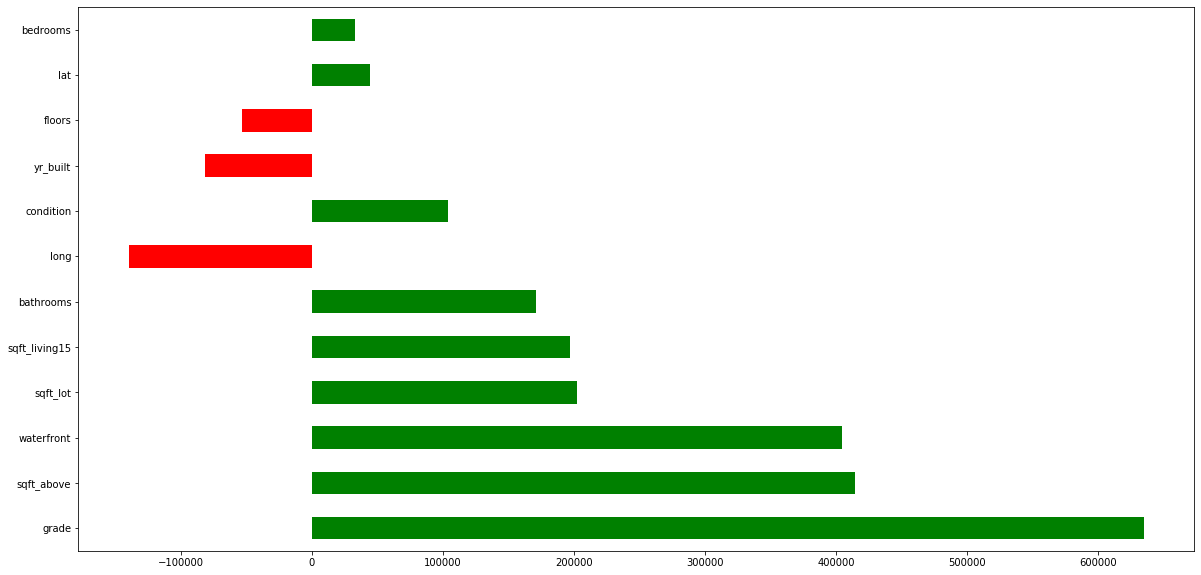

In [38]:
def coef_charts (model):
    main_features = model.params.iloc[:13].to_frame()
    main_features.rename(columns={0:'coeffs'},inplace=True)
    main_features.drop('const',axis=0,inplace=True)

    main_features['magnitude'] = abs(main_features['coeffs'])
    main_features['positive'] = main_features['coeffs'] < 0

    main_features.sort_values(by='magnitude',ascending=False,inplace=True)
    
    main_features['coeffs'].plot(kind='barh',color=main_features.positive.map({True: 'r', False: 'g'}))
   
coef_charts(model)
   

It looks like lat and bedrooms dont impact our model much. Lets drop them and see what happens.

In [39]:
predictors2 = predictors.drop(['lat','bedrooms'],axis=1)

pred_int2 = sm.add_constant(predictors2)
model2 = sm.OLS(target,pred_int2).fit()

frame2 = mse_validation (predictors2,target)

display(frame2)

Scores
train_mean_squared_error 12,055,337,862.19
test_mean_squared_error  12,118,373,029.75
train_rmse                      109,795.65
test_rmse                       110,072.97
mean_r2                               0.80

That didnt do much either. Maybe we should drop all columns with a p-value higher than 0.05?

In [40]:
pvalues = round(model2.pvalues,4)
high_pvalues = pvalues[pvalues > 0.05]
high_list = list(high_pvalues.index)

predictors3 = predictors2.drop(high_list,axis=1)

pred_int3 = sm.add_constant(predictors3)
model3 = sm.OLS(target,pred_int3).fit()

frame3 = mse_validation (predictors2,target)

display(frame3)

Scores
train_mean_squared_error 11,974,459,010.73
test_mean_squared_error  12,364,339,221.00
train_rmse                      109,426.00
test_rmse                       111,178.94
mean_r2                               0.80

Still no luck :(

### Revisiting our dataset

Looks like we should think of other ways to improve our model. Perhaps we should revist our pre-scaled features and see if we should normalize any additional features. To help us do this, lets write a master function that will help us quickly tweak our data set. This function will rely on and consolidate the functions we previously wrote when we were exploring our data. 


In [41]:
def re_pre_dazzle (dataframe,dictionary):
    
    dict = dictionary
    
    dataframe = rm_outliers_threshold(dataframe,dict['cull_cols'],dict['threshold'])
    
    dataframe = logarize(dataframe,dict['norm_cols'])
    
    dataframe = category_frame(dataframe,dict['categ_cols'])
    
    return dataframe


def model_fit(dataframe,dictionary):
    
    dict = dictionary
    
    target = dataframe[dict['target']]
    
    predictors = df_scaler(dataframe.drop(dict['target'],axis=1))  
        
    pred_int = sm.add_constant(predictors)    
    model = sm.OLS(target,pred_int).fit()
        
    return model

def repre_fit (dataframe,dictionary):
    
    model_feed = re_pre_dazzle(dataframe,dictionary)
    
    model = model_fit(model_feed,dictionary)
    
    return model      
    

Below we will find the lists that we will feed into our master function to generate a new model. We can simply specify different culling thresholds and lists of columns to normalize and pull a new model. 

Lets lower the outlier threshold to 0.95 and normalize 'floors', in addition to the other columns we normalized before, and train a new model.

In [42]:
df2 = df_preproc.copy()

pre = {}

pre['threshold'] = 0.95
pre['target'] = 'price'
pre['cull_cols'] = ['sqft_lot15','price','sqft_lot','sqft_living15']
pre['norm_cols'] = ['bathrooms','sqft_above','sqft_living15','sqft_lot','sqft_lot15','floors']
pre['categ_cols'] = ['zipcode','waterfront'] 


model4 = repre_fit(df2,pre)

display(model4.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     924.2
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        06:06:18   Log-Likelihood:            -2.3801e+05
No. Observations:               18573   AIC:                         4.762e+05
Df Residuals:                   18490   BIC:                         4.768e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.04e+16   1.21e+17      0.579      0.562   -1.68e+17    3.09e+17
bedrooms       1.119e+05    2.9e+04      3.855      0.000     5.5e+04    1.69e+05
bathrooms      1.505e+05   7387.832     20.378      0.000    1.36e+05    1.65e+05
sqft_lot       1.399e+05   1.12e+04     12.531      0.000    1.18e+05    1.62e+05
floors        -2.686e+04   3903.470     -6.881      0.000   -3.45e+04   -1.92e+04
condition      1.003e+05   4542.384     22.078      0.000    9.14e+04    1.09e+05
grade          4.352e+05   9116.882     47.738      0.000    4.17e+05    4.53e+05
sqft_above     3.497e+05   9425.933     37.103      0.000    3.31e+05    3.68e+05
yr_built      -6.952e+04   4446.927    -15.633      0.000   -7.82e+04   -6.08e+04
lat            2.617e+04   2.54e+04      1.029      0.304   -2.37e+04     7.6e+04
long           -7.97e+04   3.58e+04     -2.224      0.026    -1.5e+05   -9462.039
sqft_living15  1.908e+05   7015.309     27.191      0.000    1.77e+05    2.05e+05
sqft_lot15    -1.272e+04   1.09e+04     -1.162      0.245   -3.42e+04    8740.652
98001          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98002          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98003          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98004          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98005          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98006          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98007          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98008          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98010          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98011          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98014          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98019          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98022          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98023          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98024          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98027          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98028          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98029          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98030          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98031          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98032          1.341e+15   2.31e+15      0.579      0.562    -3.2e+15    5.88e+15
98033          1.341e+15   2.31e+15      0.579   

Looks like our R squared went up a bit. Lets just do a train test split validation and see if this holds up, and get some mean error scores. 

In [43]:
pd.options.display.float_format = '{:,.2f}'.format

df3 = df_preproc.copy()

pre_proc_df = re_pre_dazzle(df3,pre)

target = pre_proc_df['price']    
predictors = df_scaler(pre_proc_df.drop('price',axis=1))

frame = mse_validation (predictors,target)

display(frame)

Scores
train_mean_squared_error 7,929,095,438.90
test_mean_squared_error  7,933,876,659.78
train_rmse                      89,044.77
test_rmse                       89,066.07
mean_r2                              0.80

So it looks like our r-squared stayed stable but out mean error scores went down quite a bit. 

# INTERPRET

## Most Important features. 

Lets examine the coefficients from our updated model.

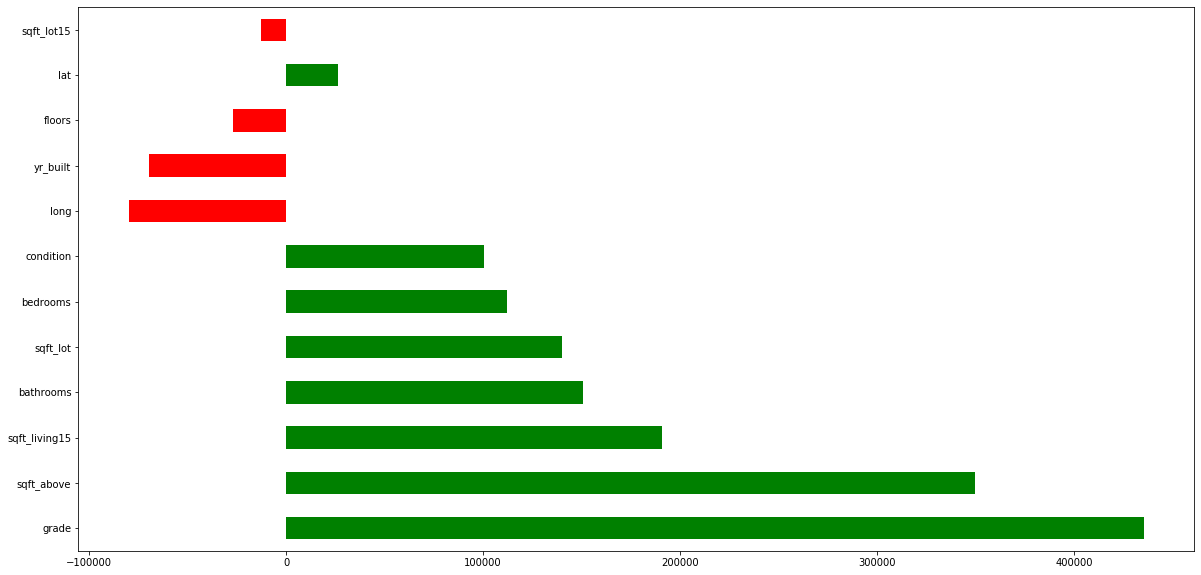

In [44]:
coef_charts(model4)

plt.savefig('plot_images/coeff_chart')

As we would expect, the square footage of a houe and the lot its on has a huge effect on the price. The most important factor appears to be grade, which would make sense because we can assume that 'grade' is assigned based on an overall assessment of the quality of the house and is essentially trying to do the same thing we are: come as close to evaluating the price of a house based on details about it. 

## Mapping the data
I would like to explore the variations in data across zipcodes in depth. It would be nice to have a geographic sense of house values, would'nt it? Lets import the GeoPands library to generate some map based visualizations to see how the different metrics in our dataset vary across geographic regions.

Lets start by looking at what zipcodes have the highest median value. 

In [45]:
import geopandas as gpd

df4 = df_preproc.copy()
df4 = rm_outliers_threshold(df4,cull_cols,0.95)
df_zipcode = df4.groupby('zipcode').median()

df_zipcode.reset_index(level=0, inplace=True)

king_count = gpd.read_file('king_county_shapefile/Zipcodes_for_King_County_and_Surrounding_Area_Shorelines__zipcode_shore_area.shp')

king_count.drop(['OBJECTID','ZIP','ZIP_TYPE'],axis=1,inplace=True) 
king_count['ZIPCODE'] = pd.to_numeric(king_count['ZIPCODE'])
king_count = king_count.merge(df_zipcode,left_on='ZIPCODE',right_on='zipcode',how='inner')

king_count['coords']= king_count['geometry'].apply(lambda x : x.representative_point().coords[:])
king_count['coords']= [coords[0] for coords in king_count['coords']]

#dropping the western most zipcodes. Theyre sparsley populated, not very itneresting and is skewing out maps below
king_count = king_count[king_count['long'] < -122.00]

### Price 
Lets start by looking at what zipcodes have the highest median sale price 

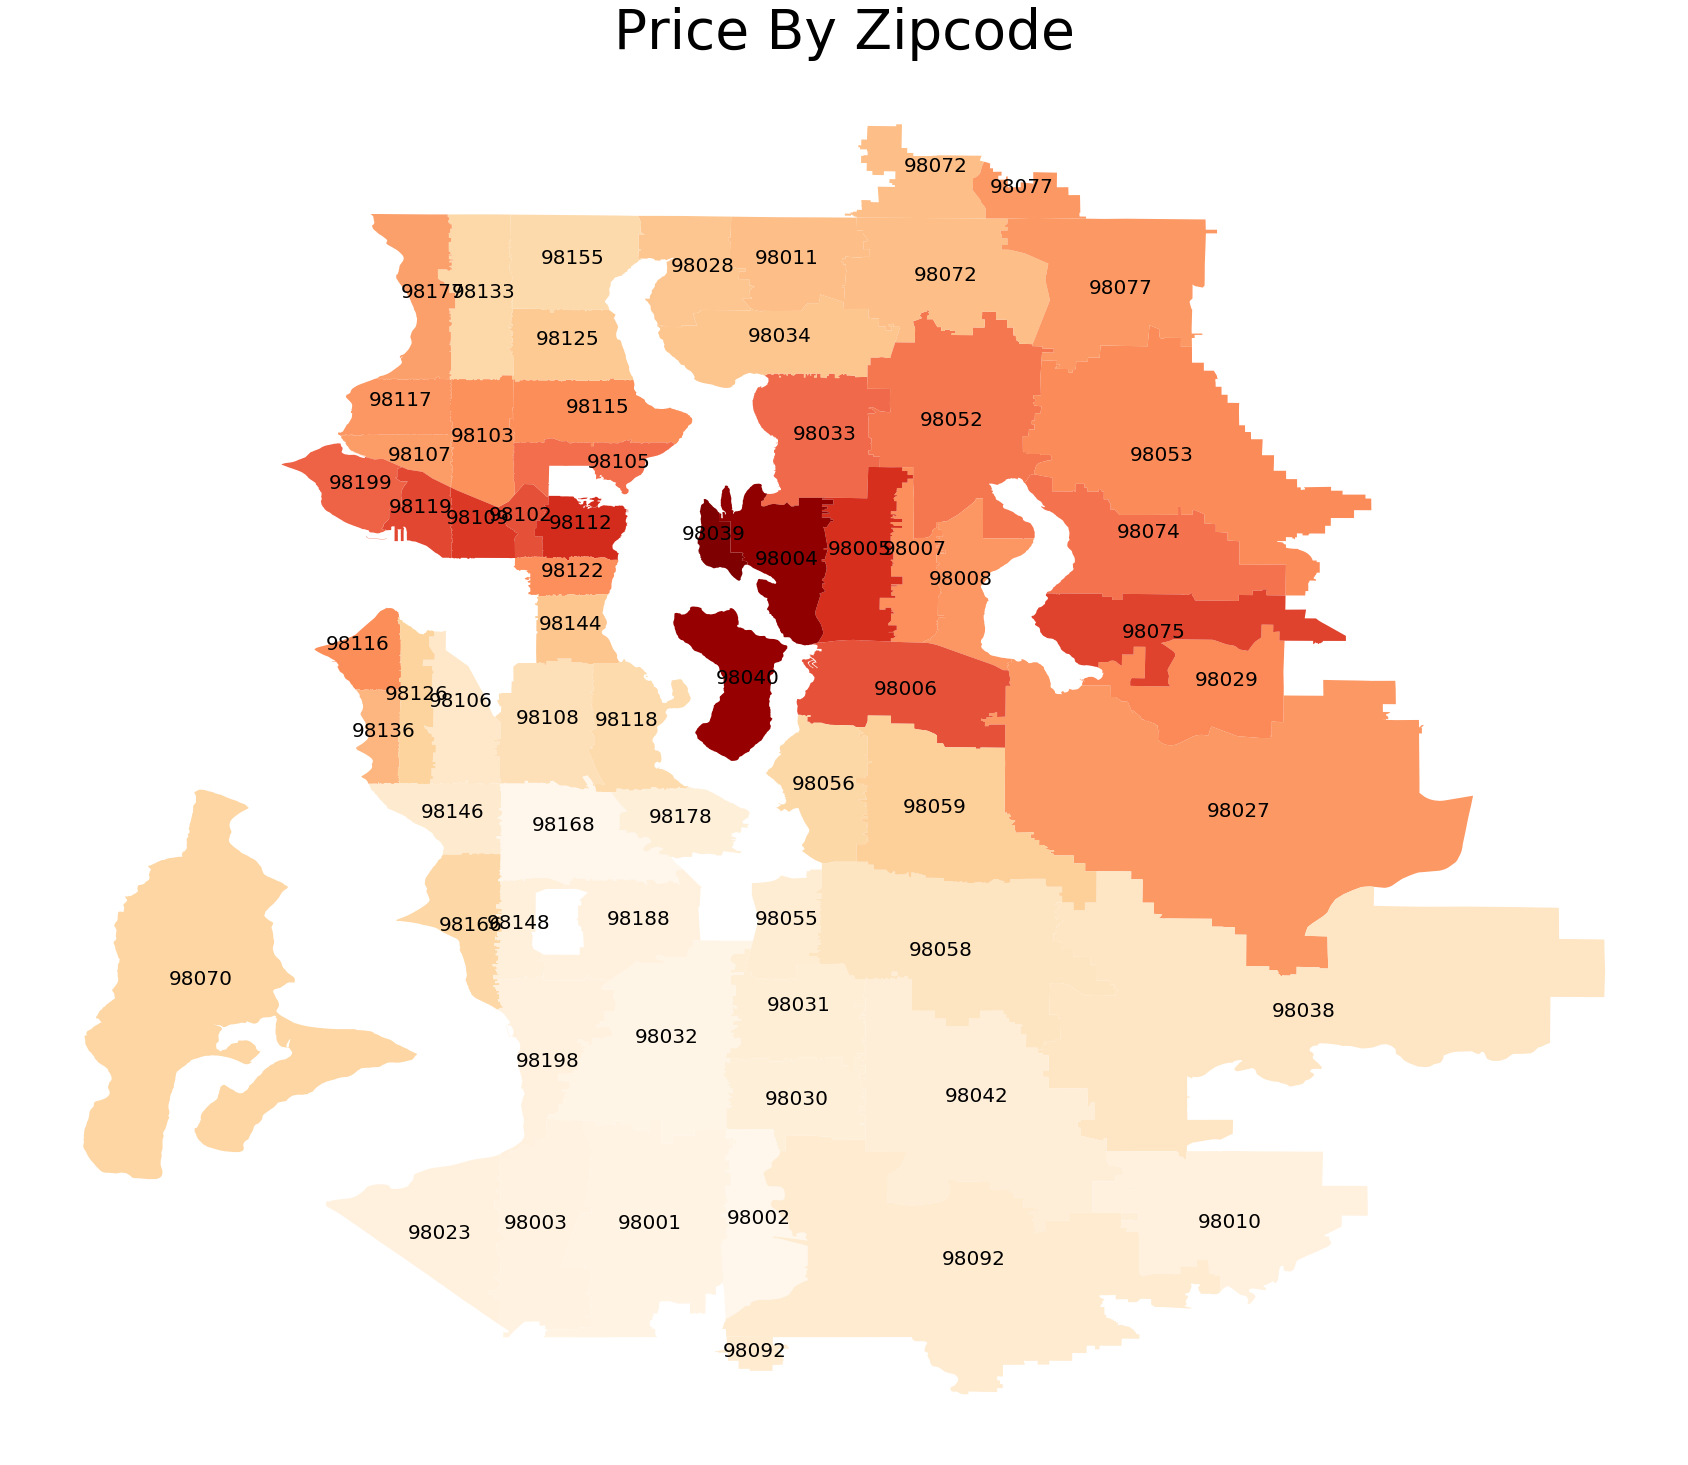

In [46]:
mpl.rcParams['figure.figsize'] = (30,30)

title_dict = {'fontsize': 55,
 'fontweight' : 15}

king_count.plot(column='price',cmap='OrRd',legend=False)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],
                 horizontalalignment='center',size=20)

plt.axis('off')
plt.title('Price By Zipcode',fontdict=title_dict)

plt.savefig('plot_images/price_map')

As one would expect, the price of houses seems to get higher closer to the city center and drop as we head out. 

98040 and 98039 seem to have the most expensive properties! I wonder why that is?


### Indoor Square Footage

Now lets see how indoor square footage varies across the region. I suspect, it will vary in the opposite way as price, which is to say that indoor square footage per house will be smaller towards the city center and larger as we go out. 

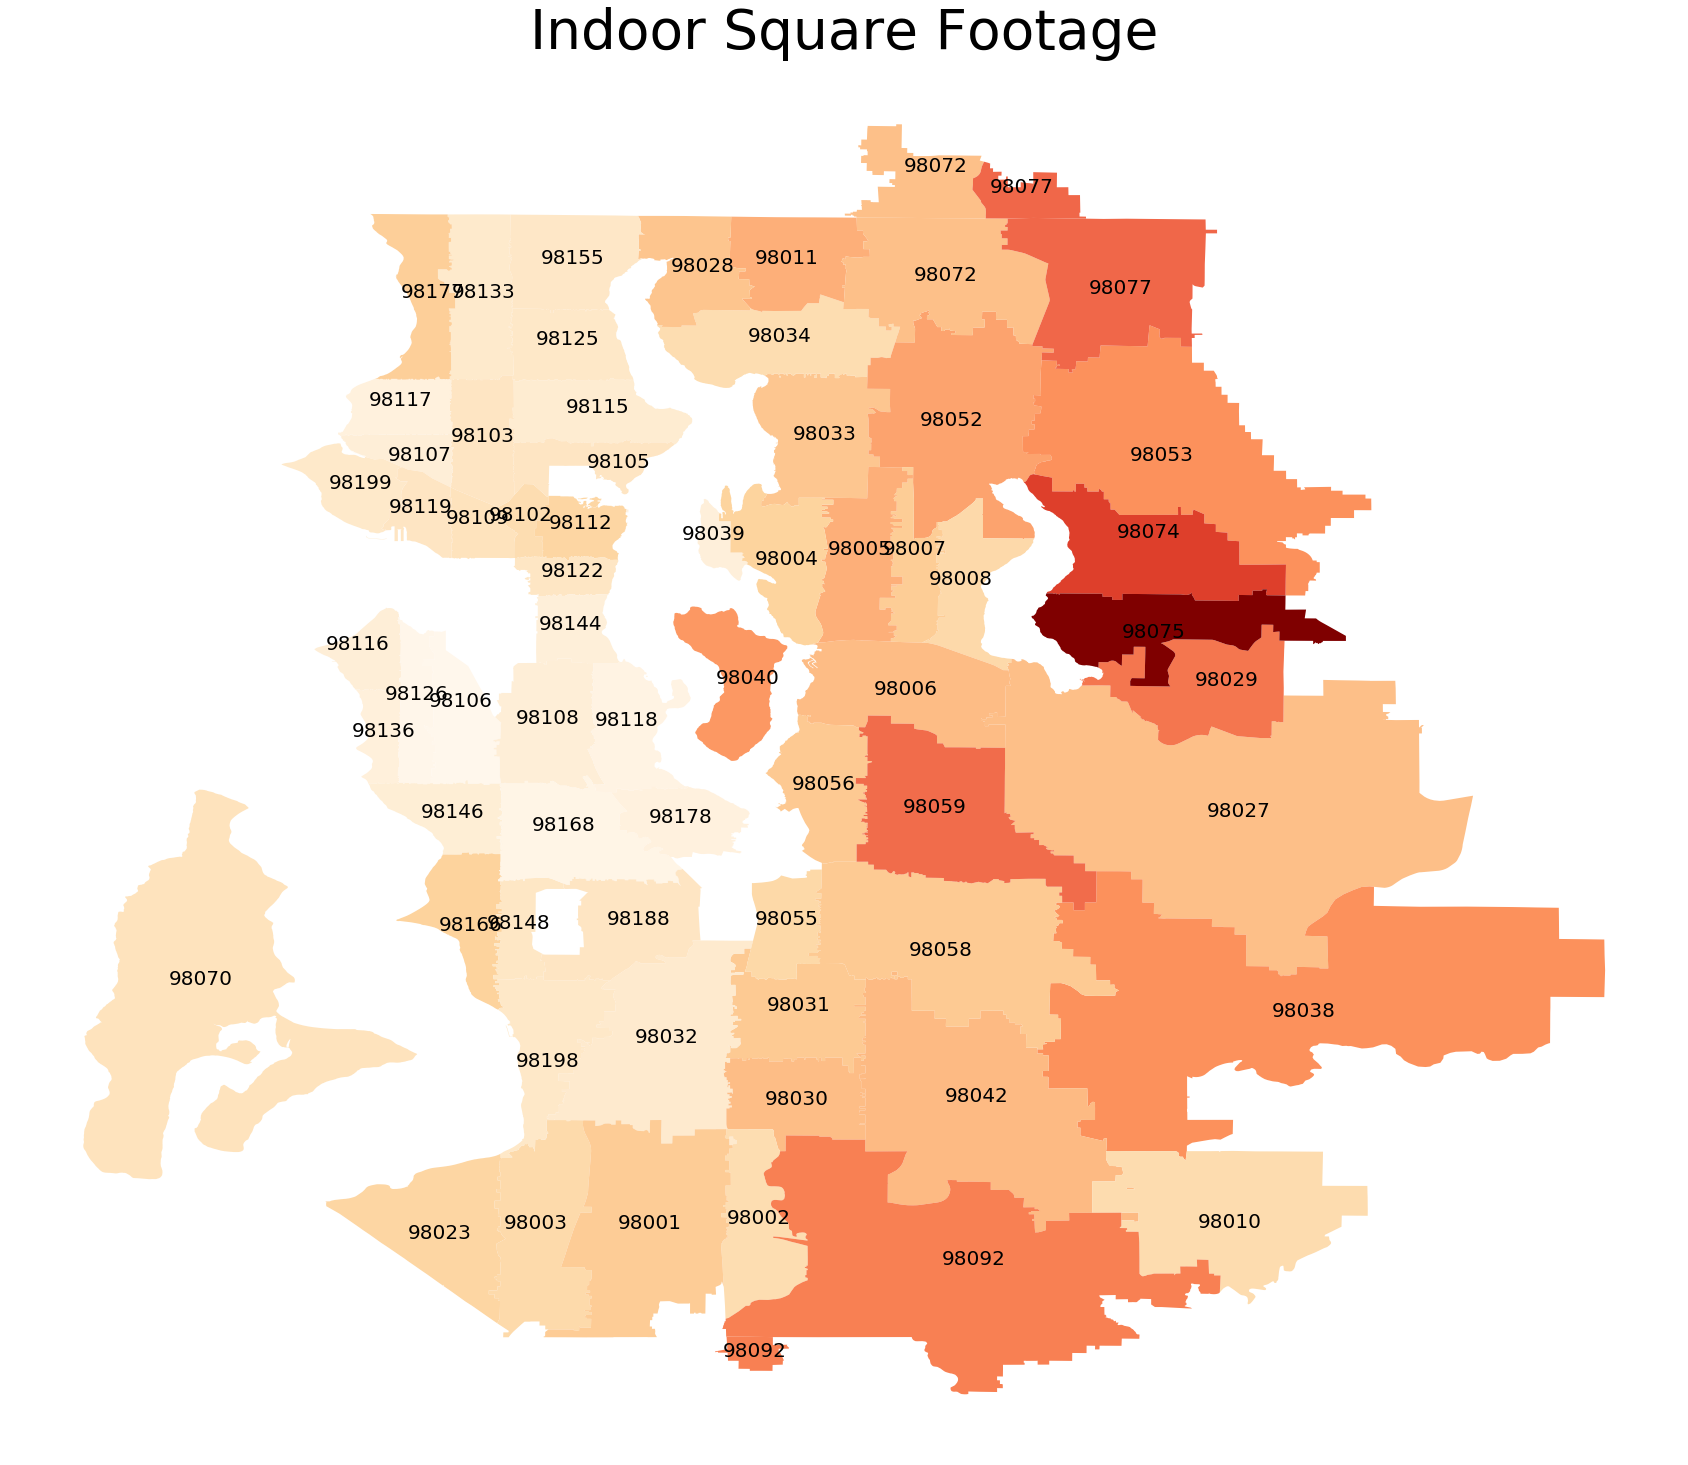

In [47]:
king_count.plot(column='sqft_above',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Indoor Square Footage',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/sqft_above_map')

Sure enough, our hypothesis checks out. Oh my 98075 looks like it has some huge mansions!It also seemed like the median price here was high too, relative to its neighbors.
This must be a fancy neighborhood! 

### Lot size
Now lets see see how lot sizes change. I Imagine similarly to indooor square footage. 

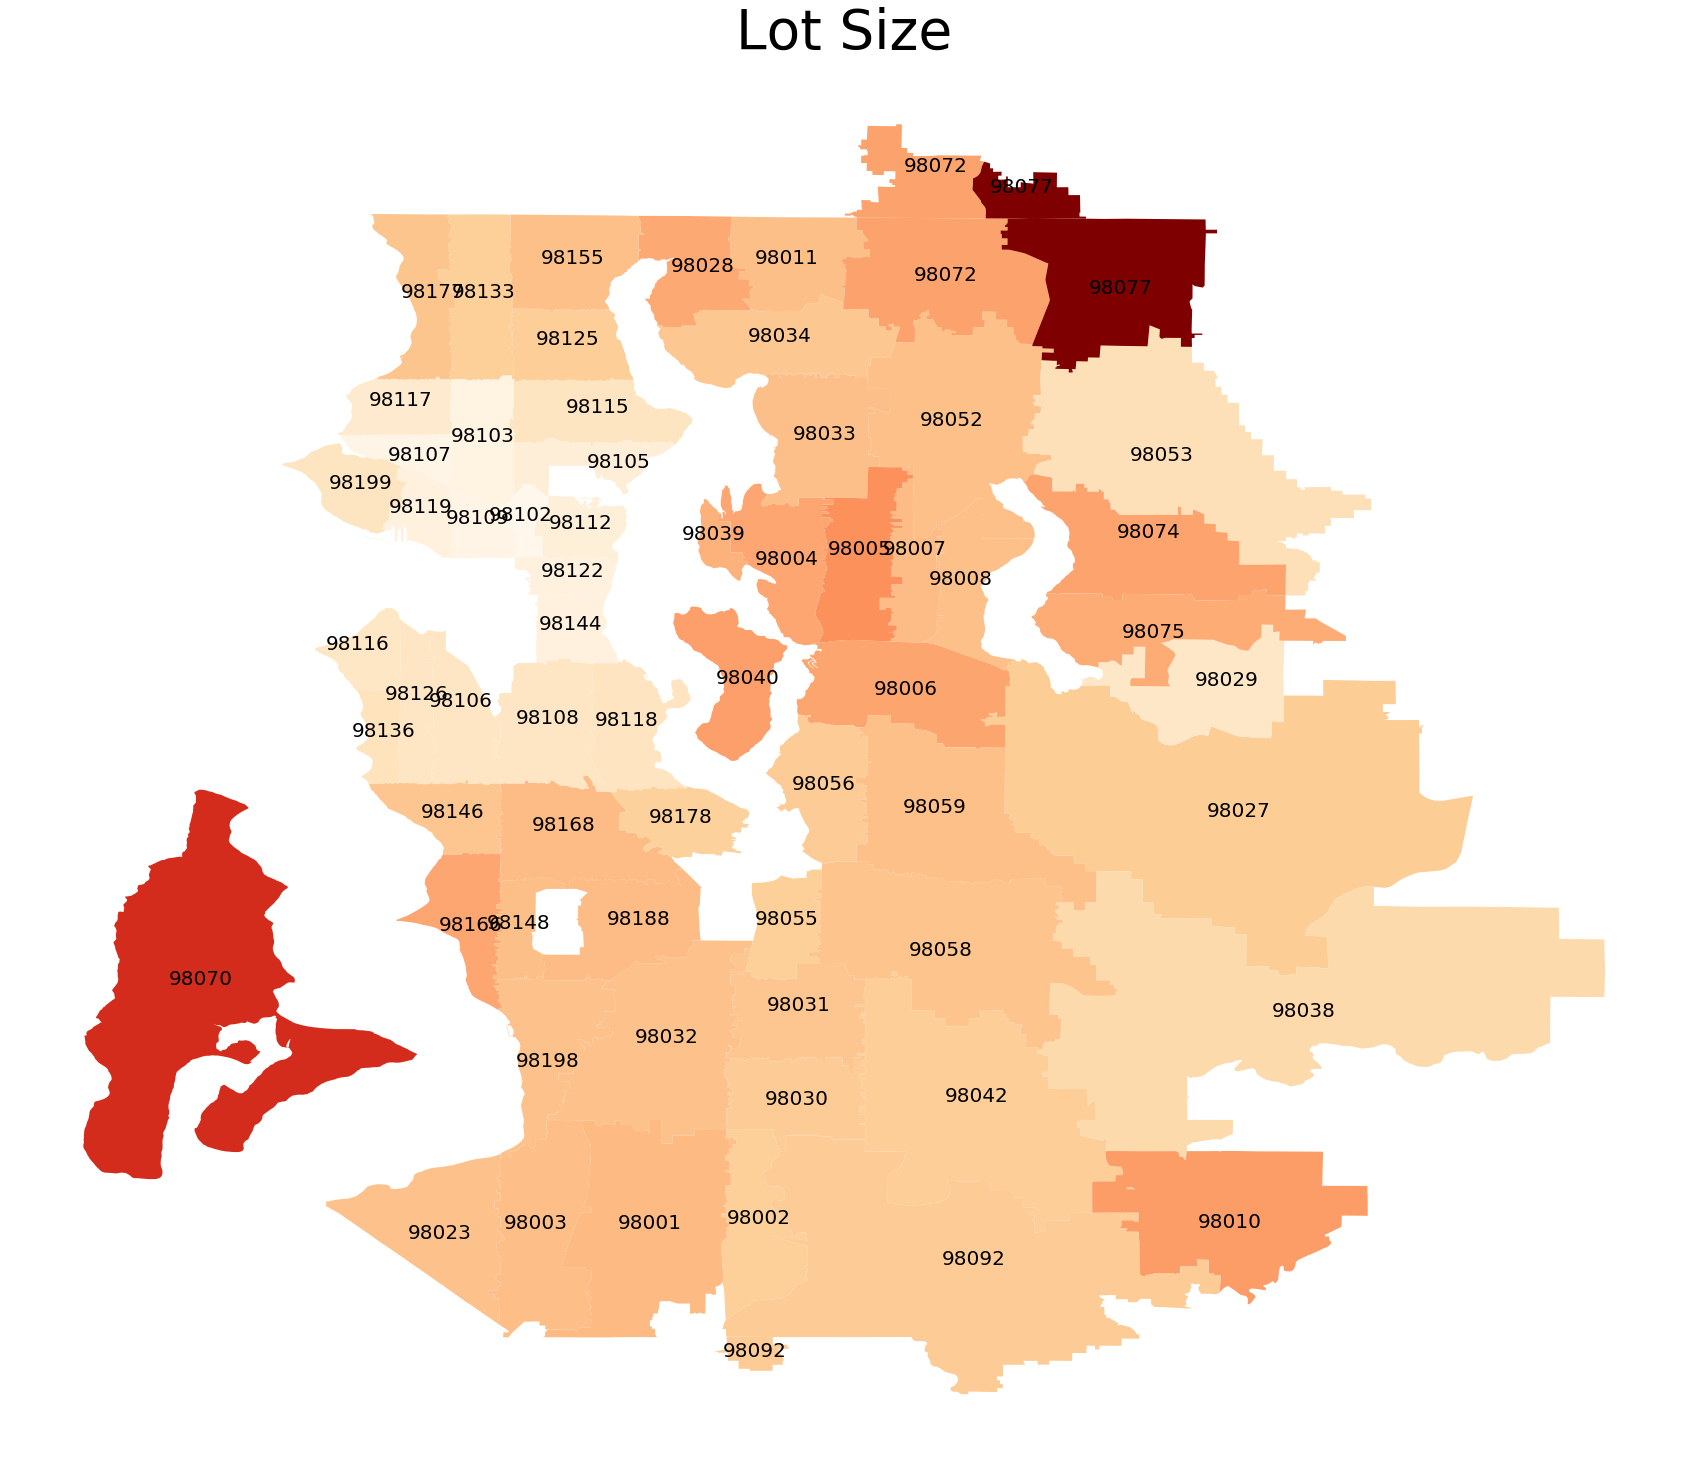

In [48]:
king_count.plot(column='sqft_lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot Size',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_size_chart')

Looks like 98075's neighbors to the north, 98074, have bigger yards but smaller houses. 
Lets engineer a new features called "indoor/lot". This will be ratio of the indoor square footage to the lot size. 
Basically, how much indoor space per unit of lot size. Lets make a new map for this feature. Might be a better way to get an estimate of living space density.

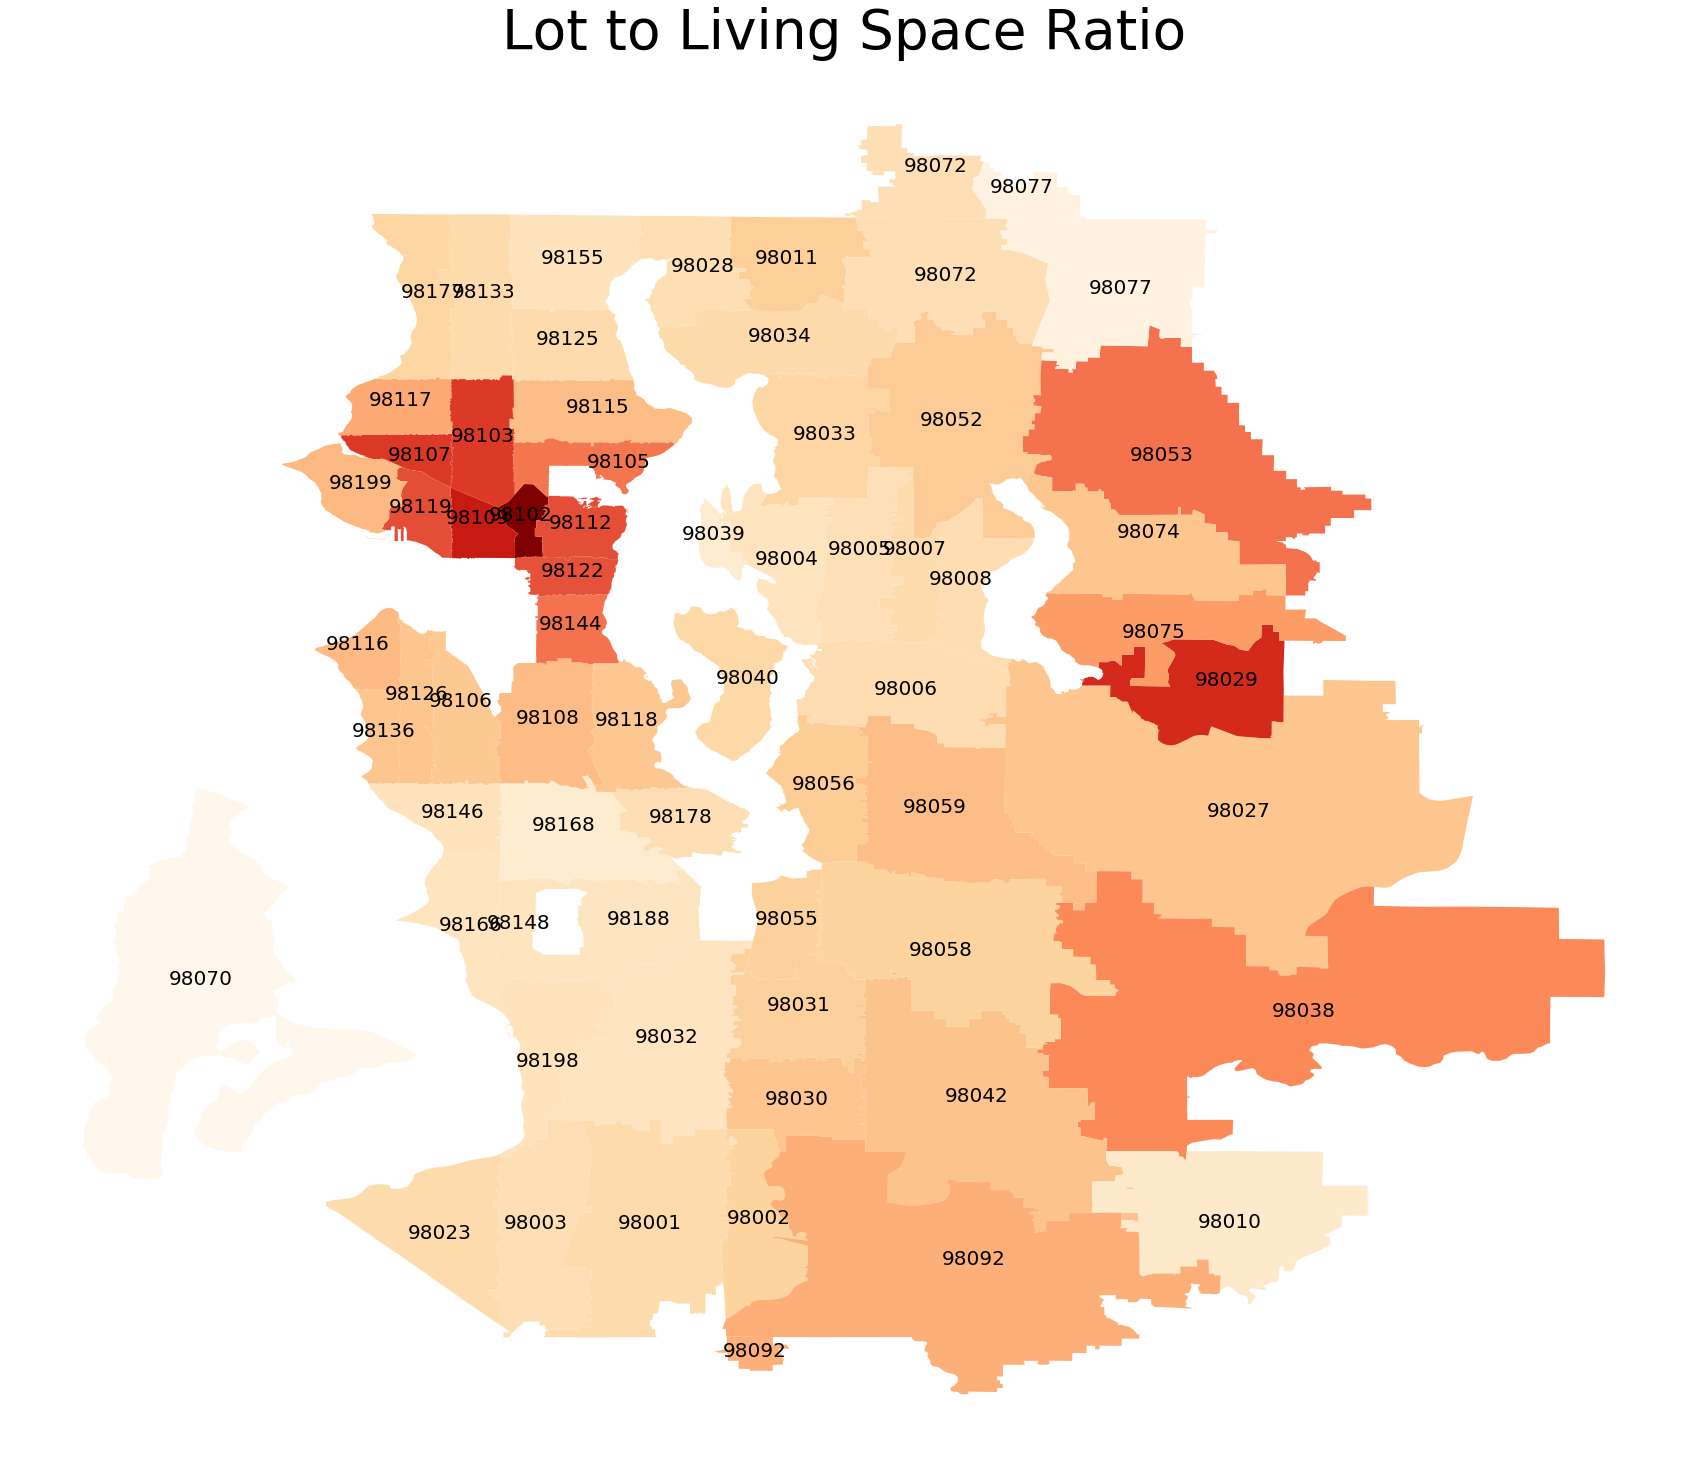

In [49]:
king_count['indoor/lot'] = king_count['sqft_above']/king_count['sqft_lot']

king_count.plot(column='indoor/lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot to Living Space Ratio',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_vs_indoor_map')

Fascinating. As well see, there is more living space on each lot closer to the city center. This is probably due to the fact there are more apartment buildings closer to the city, so the living space per unit area is denser which is in line with what we expect from major cities. 

It also confirms that 98074 people do have larger yards, while 98075 folks have larger houses. 


### Price per square foot

Let's engineer a new feature called "Price/Sqft" which will reflect the price per square foot. My hypothesis is that this metric will vary in tandem with geographic location. 

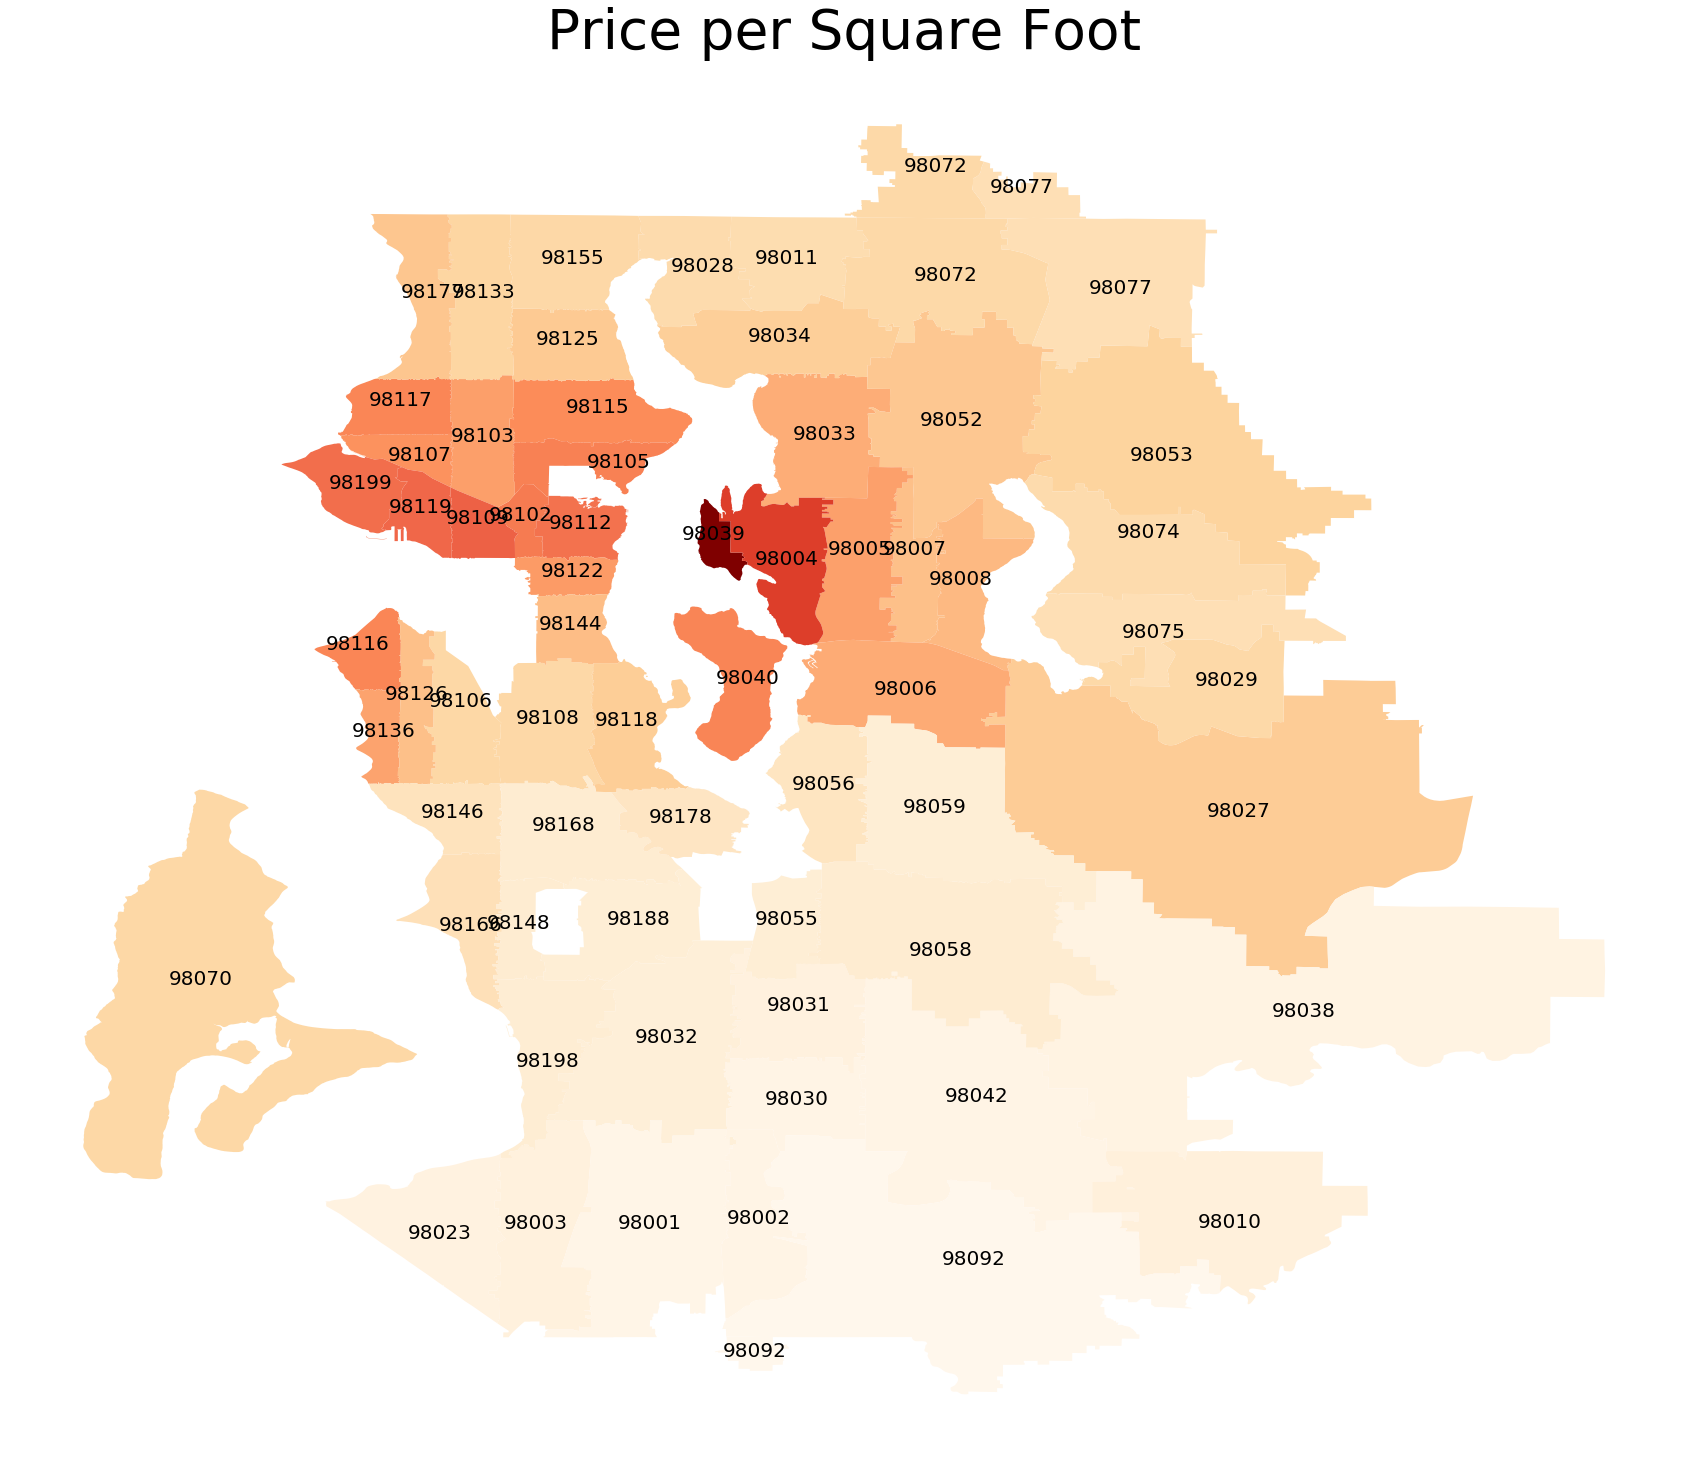

In [50]:
king_count['price/sqft'] = king_count['price']/king_count['sqft_above']

king_count.plot(column='price/sqft',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Price per Square Foot',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/price_sqft_map')

This is a more stable metric and aligns closely with the proposition that living space is more valuable closer to the city center. 

# CONCLUSIONS & RECOMMENDATIONS

It seems that the "grade" score corelates the most with the price. This makes sense because the grade system is probably meant to reflect the value of the house and is essentially an analogue version of our linear regression model. After that, above ground square footage of living space is the next most significant factor. This also makes sense with the fundamental mechanics of the real estate market: bigger houses are more expensive. 

We also saw that that generally speaking, the overall price and price per square foot of living space decreases as you move further east and away from the city center. We also saw that two neighborhood (98039 and 98040) seem to be the most high end of them all. 

